MNIST Images: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
MNIST Lables: [5 0 4 ... 5 6 8]
Digit 0
Mnist Images 5923
Mnist Labels 5923
Digit 1
Mnist Images 6742
Mnist Labels 6742
Digit 2
Mnist Images 5958
Mnist Labels 5958
Digit 3
Mnist Images 6131
Mnist Labels 6131
Digit 4
Mnist Images 5842
Mnist Labels 5842
Digit 5
Mnist Images 5421
Mnist Labels 5421
Digit 6
Mnist Images 5918
Mnist Labels 5918
Digit 7
Mnist Images 6265
Mnist Labels 6265
Digit 8
Mnist Images 5851
Mnist Labels 5851
Digit 9
Mnist Images 5949
Mnist Labels 5949


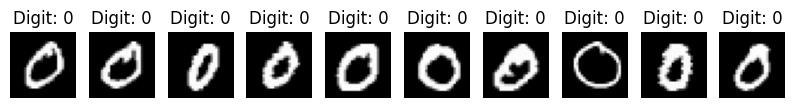

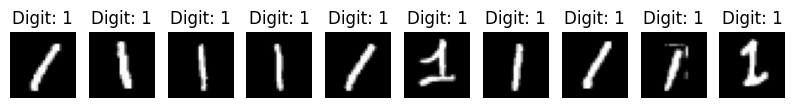

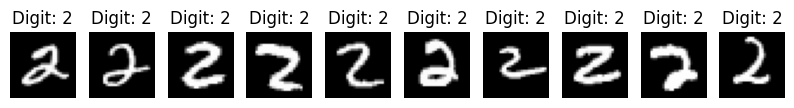

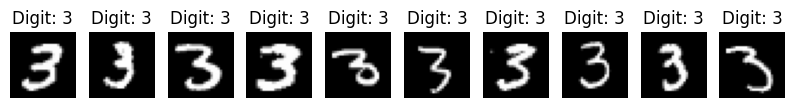

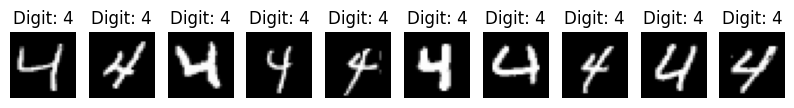

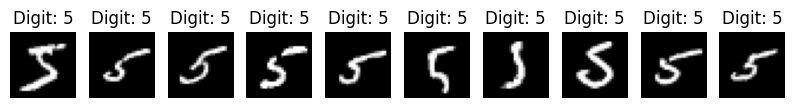

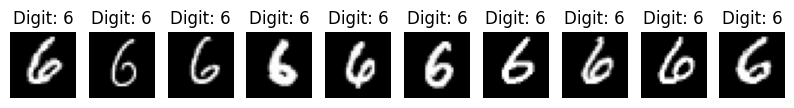

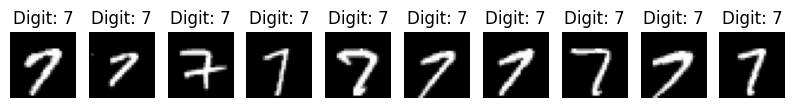

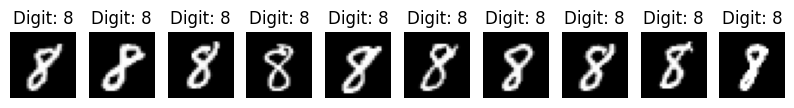

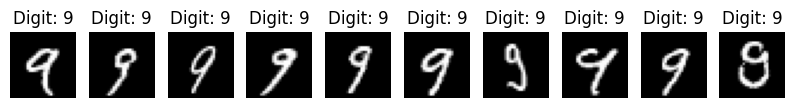

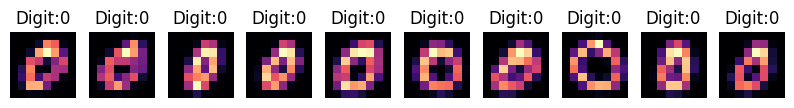

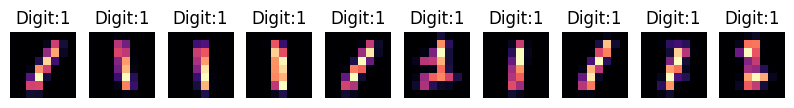

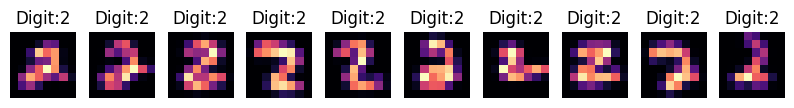

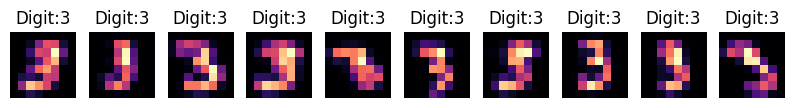

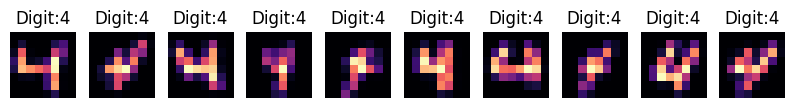

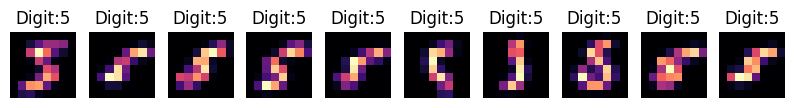

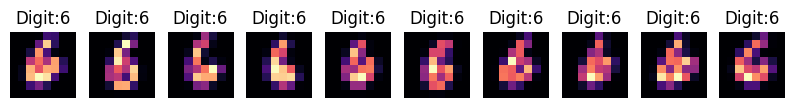

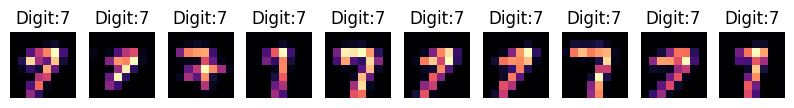

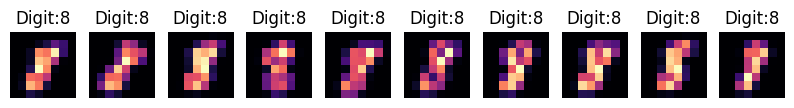

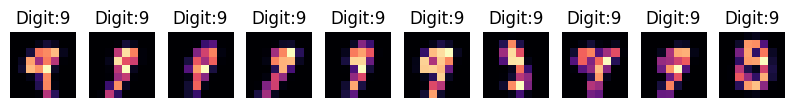

Digit zero [[0.00000000e+00 0.00000000e+00 5.02834929e-05 ... 5.04943733e-03
  2.54318312e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.64488586e-06 ... 2.44551014e-02
  2.39711887e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.95373525e-05 ... 5.52719367e-02
  4.29082453e-06 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.33822537e-04
  1.93436207e-08 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.30475596e-07 ... 1.49584173e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.45087318e-07 ... 5.72852573e-04
  3.43886591e-08 0.00000000e+00]]
Digit one [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.41505166e-07
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.26532695e-02 ... 2.13737652e+00
  3.00926886e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.68420508e-04 ... 4.41504330e-01
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00300256e-08
  0.0000000

In [1]:
# Quantum Amplitude Encoding

import idx2numpy
import numpy as np
import torch
from PIL import Image


def load_MNIST_dataset_Images(file_path): # for now trial on mnist dataset
    images = idx2numpy.convert_from_file(file_path)
    images = images.reshape(images.shape[0], -1)
    images = images.astype(np.float64)
    return images

def load_MNIST_dataset_Labels(file_path):
    labels = idx2numpy.convert_from_file(file_path)
    return labels

# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
train_images_file = r"D:\Downloads Now\archive\train-images.idx3-ubyte"
train_labels_file = r"D:Downloads Now\archive\train-labels.idx1-ubyte"

mnist_images = load_MNIST_dataset_Images(train_images_file)
mnist_labels = load_MNIST_dataset_Labels(train_labels_file)

print('MNIST Images:', mnist_images)
print('MNIST Lables:', mnist_labels)


# Separating the load dataset into train labels and the train digits 

def separate_images_and_labels(images , labels , digit):
    digit_images = []
    digit_labels = []
    for image,label in zip(images,labels):
        if label == digit:
            digit_images.append(image)
            digit_labels.append(label)
    return digit_images,digit_labels

digits_to_separate = [0,1,2,3,4,5,6,7,8,9]

digit_image = {}
digit_label = {}

for digit in digits_to_separate:
    digit_image[digit], digit_label[digit] = separate_images_and_labels(mnist_images,mnist_labels,digit)

for digit in digits_to_separate:
    print('Digit', digit)
    print('Mnist Images', len(digit_image[digit]))
    print('Mnist Labels', len(digit_label[digit]))

import matplotlib.pyplot as plt

num_samples = 10 

for digit in digit_image.keys():
    sample_images = digit_image[digit][:num_samples]
    plt.figure(figsize = (10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(sample_images[i].reshape(28,28), cmap = 'gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')
    plt.show()

# Resize the image to a higher accuracy and match the dimensions of the qubits

from skimage.transform import resize

def resize_images(images, new_size = (8,8)):
    resized_images = []
    for image in images:
        resized_image = resize(image.reshape(28,28), new_size)
        resized_images.append(resized_image.flatten())
    return resized_images

new_size = (8,8)

resized_digit_images = {}
for digit in digit_image.keys():
    resized_digit_images[digit] = resize_images(digit_image[digit], new_size = new_size)

for digit in digit_image.keys():
    sample_images = resized_digit_images[digit][:num_samples]
    plt.figure(figsize =(10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(sample_images[i].reshape(new_size), cmap = 'magma')
        plt.title(f"Digit:{digit}")
        plt.axis('off')
    plt.show()

# Converting all the digits in to arrays

Digit_zero = []

for image in resized_digit_images[0]:
    Digit_zero_ = image
    Digit_zero.append(Digit_zero_)

Digit_zero = np.array(Digit_zero)

print('Digit zero',Digit_zero)

Digit_one = []

for image in resized_digit_images[1]:
    Digit_one_ = image
    Digit_one.append(Digit_one_)

Digit_one = np.array(Digit_one)

print('Digit one',Digit_one)

Digit_two = []

for image in resized_digit_images[2]:
    Digit_two_ = image
    Digit_two.append(Digit_two_)

Digit_two = np.array(Digit_two)

print('Digit two',Digit_two)

Digit_three = []

for image in resized_digit_images[3]:
    Digit_three_ = image
    Digit_three.append(Digit_three_)

Digit_three = np.array(Digit_three)

print('Digit three',Digit_three)

Digit_four = []

for image in resized_digit_images[4]:
    Digit_four_ = image
    Digit_four.append(Digit_four_)

Digit_four = np.array(Digit_four)

print('Digit four',Digit_four)

Digit_fifth = []

for image in resized_digit_images[5]:
    Digit_fifth_ = image
    Digit_fifth.append(Digit_fifth_)

Digit_fifth = np.array(Digit_fifth)

print('Digit fifth',Digit_fifth)

Digit_sixth = []

for image in resized_digit_images[6]:
    Digit_sixth_ = image
    Digit_sixth.append(Digit_sixth_)

Digit_sixth = np.array(Digit_sixth)

print('Digit Sixth',Digit_sixth)

Digit_seventh = []

for image in resized_digit_images[7]:
    Digit_seventh_ = image
    Digit_seventh.append(Digit_seventh_)

Digit_seventh = np.array(Digit_seventh)

print('Digit seventh',Digit_seventh)

Digit_eigth = []

for image in resized_digit_images[8]:
    Digit_eigth_ = image
    Digit_eigth.append(Digit_eigth_)

Digit_eigth = np.array(Digit_eigth)

print('Digit eigth',Digit_eigth)

Digit_nineth = []

for image in resized_digit_images[9]:
    Digit_nineth_ = image
    Digit_nineth.append(Digit_nineth_)

Digit_nineth = np.array(Digit_nineth)

print('Digit nineth',Digit_nineth)

# Digit zero to Nine grey scale matrix conversion by reshaping a row array into a (N,N) size

# Quantum Amplitude Encoding of MNIST Dataset

N = 8

Digit_zero_ = []

for i in range(len(Digit_zero)):
    Digit_zero_.append((Digit_zero[i].reshape(N**2))/np.linalg.norm(Digit_zero[i]))

Digit_one_ = []

for i in range(len(Digit_one)):
    Digit_one_.append((Digit_one[i].reshape(N**2))/np.linalg.norm(Digit_one[i]))

Digit_two_ = []

for i in range(len(Digit_two)):
    Digit_two_.append((Digit_two[i].reshape(N**2))/np.linalg.norm(Digit_two[i]))

Digit_three_ = []

for i in range(len(Digit_three)):
    Digit_three_.append((Digit_three[i].reshape(N**2))/np.linalg.norm(Digit_three[i]))

Digit_four_ = []

for i in range(len(Digit_four)):
    Digit_four_.append((Digit_four[i].reshape(N**2))/np.linalg.norm(Digit_four[i]))

Digit_five_ = []

for i in range(len(Digit_fifth)):
    Digit_five_.append((Digit_fifth[i].reshape(N**2))/np.linalg.norm(Digit_fifth[i]))

Digit_sixth_ = []

for i in range(len(Digit_sixth)):
    Digit_sixth_.append((Digit_sixth[i].reshape(N**2))/np.linalg.norm(Digit_sixth[i]))

Digit_seventh_ = []

for i in range(len(Digit_seventh)):
    Digit_seventh_.append((Digit_seventh[i].reshape(N**2))/np.linalg.norm(Digit_seventh[i]))

Digit_eigth_ = []

for i in range(len(Digit_eigth)):
    Digit_eigth_.append((Digit_eigth[i].reshape(N**2))/np.linalg.norm(Digit_eigth[i]))

Digit_nineth_ = []

for i in range(len(Digit_nineth)):
    Digit_nineth_.append((Digit_nineth[i].reshape(N**2))/np.linalg.norm(Digit_nineth[i]))


Input_state_vector_zero = np.array(Digit_zero_)
Input_state_vector_one = np.array(Digit_one_)
Input_state_vector_two = np.array(Digit_two_)
Input_state_vector_three = np.array(Digit_three_)
Input_state_vector_four = np.array(Digit_four_)
Input_state_vector_fifth = np.array(Digit_five_)
Input_state_vector_sixth = np.array(Digit_sixth_)
Input_state_vector_seventh = np.array(Digit_seventh_)
Input_state_vector_eigth = np.array(Digit_eigth_)
Input_state_vector_nineth = np.array(Digit_nineth_)

input_state_vectors = []

input_state_vectors.append(Input_state_vector_zero)
input_state_vectors.append(Input_state_vector_one)
input_state_vectors.append(Input_state_vector_two)
input_state_vectors.append(Input_state_vector_three)
input_state_vectors.append(Input_state_vector_four)
input_state_vectors.append(Input_state_vector_fifth)
input_state_vectors.append(Input_state_vector_sixth)
input_state_vectors.append(Input_state_vector_seventh)
input_state_vectors.append(Input_state_vector_eigth)
input_state_vectors.append(Input_state_vector_nineth)

input_state_vectors = np.concatenate(input_state_vectors,axis = 0)

labels = []
for i in range(10):
    labels.append(i)

print(labels)

labels_zero = [labels[0]]*Digit_zero.shape[0]
labels_one  = [labels[1]]*Digit_one.shape[0]
labels_two  = [labels[2]]*Digit_two.shape[0]
labels_three  = [labels[3]]*Digit_three.shape[0]
labels_four  = [labels[4]]*Digit_four.shape[0]
labels_five  = [labels[5]]*Digit_fifth.shape[0]
labels_six  = [labels[6]]*Digit_sixth.shape[0]
labels_seven  = [labels[7]]*Digit_seventh.shape[0]
labels_eigth  = [labels[8]]*Digit_eigth.shape[0]
labels_nineth  = [labels[9]]*Digit_nineth.shape[0]
labels_zero = np.array(labels_zero,dtype = int)
labels_one = np.array(labels_one,dtype = int)
labels_two = np.array(labels_two,dtype = int)
labels_three = np.array(labels_three,dtype = int)
labels_four = np.array(labels_four,dtype = int)
labels_five = np.array(labels_five,dtype = int)
labels_six = np.array(labels_six,dtype = int)
labels_seven = np.array(labels_seven,dtype = int)
labels_eigth = np.array(labels_eigth,dtype = int)
labels_nineth = np.array(labels_nineth,dtype = int)

labels_new_train = np.concatenate((labels_zero,labels_one))
labels_new_train = np.concatenate((labels_new_train,labels_two))
labels_new_train = np.concatenate((labels_new_train,labels_three))
labels_new_train = np.concatenate((labels_new_train,labels_four))
labels_new_train = np.concatenate((labels_new_train,labels_five))
labels_new_train = np.concatenate((labels_new_train,labels_six))
labels_new_train = np.concatenate((labels_new_train,labels_seven))
labels_new_train = np.concatenate((labels_new_train,labels_eigth))
labels_new_train = np.concatenate((labels_new_train,labels_nineth))


target_states_combined = np.zeros((60000, 64), dtype=np.float64)
target_states_combined[0:Digit_zero.shape[0], 0] = 1
target_states_combined[Digit_zero.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0], 7] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]:Digit_zero.shape[0] + Digit_one.shape[0]+Digit_two.shape[0], 14] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0], 21] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0], 28] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0], 35] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0], 42] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0], 49] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0], 56] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]+Digit_nineth.shape[0], 63] = 1
target_states_combined = torch.tensor(target_states_combined, dtype=torch.float64)

# Test Dataset 

# Load MNIST test dataset
images = idx2numpy.convert_from_file(r"D:\Downloads Now\archive\\t10k-images.idx3-ubyte")# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
labelss = idx2numpy.convert_from_file(r"D:\Downloads Now\archive\\t10k-labels.idx1-ubyte")

# Resize images to 32x32
images_resized = np.array([np.array(Image.fromarray(img).resize((8, 8))) for img in images])

# Normalize vectors
test_images = images_resized 

input_state_test_vectors = []


# Digit zero to Nine grey scale matrix conversion by reshaping a row array into a (N,N) size

N = 8


for i in range(len(images_resized)):
    input_state_test_vectors.append((images_resized[i].reshape(N**2,1))/np.linalg.norm(images_resized[i]))

input_state_test_vectors = np.array(input_state_test_vectors,dtype = np.float64)
input_state_test_vectors = torch.tensor(input_state_test_vectors,dtype = torch.float64)

In [2]:

import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import scipy.linalg as la
# import pennylane as qml
import torch.nn.functional as F

input_state_vectors = np.array(input_state_vectors, dtype=np.complex128)
input_vectors = torch.tensor(input_state_vectors, dtype=torch.complex128)


Ket_0 = torch.tensor([1, 0])
Ket_1 = torch.tensor([0, 1])

def number_to_target_state(num):
    binary = f"{num:032b}"  # 32-bit zero-padded binary string
    return torch.concatenate([Ket_1 if bit == '1' else Ket_0 for bit in binary], dim=0)

numbers = [
    0,
    477218588,
    954437176,
    1431655764,
    1908874352,
    2386092940,
    2863311528,
    3340530116,
    3817748704,
    4294967295
]

target_states = [number_to_target_state(num) for num in numbers]


target_states_combined = torch.zeros((60000, 64), dtype=torch.complex128)
target_states_combined[0:Digit_zero.shape[0]] = target_states[0]
target_states_combined[Digit_zero.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]] = target_states[1]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]:Digit_zero.shape[0] + Digit_one.shape[0]+Digit_two.shape[0]] = target_states[2]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]] = target_states[3]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]] = target_states[4]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]] = target_states[5]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]] = target_states[6]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]] = target_states[7]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]] = target_states[8]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]+Digit_nineth.shape[0]] = target_states[9]
target_states_combined = torch.tensor(target_states_combined, dtype=torch.complex128)



labels_train = torch.tensor(labels_new_train , dtype = torch.long)
labels_test = torch.tensor(labelss , dtype = torch.long)
input_state_test_vectors = torch.tensor(input_state_test_vectors,dtype = torch.complex128)


# Define the Machine Learning By Conjugate Gradients Model
class UnitaryMatrixModel(nn.Module):
    def __init__(self):
        super().__init__()
        # self.fc = nn.Linear(32, 32, bias=False,dtype = torch.float64) # for Unitary Block Encoding Method
        self.U = nn.Linear(64, 64, bias=False,dtype = torch.complex128)
        self.U_0 = nn.Linear(32, 32, bias=False,dtype = torch.complex128)
        self.U_1 = nn.Linear(32, 32, bias=False,dtype = torch.complex128)
        self.U_00 = nn.Linear(16, 16, bias=False,dtype = torch.complex128)
        self.U_01 = nn.Linear(16, 16, bias=False,dtype = torch.complex128)
        self.U_10 = nn.Linear(16, 16, bias=False,dtype = torch.complex128)
        self.U_11 = nn.Linear(16, 16, bias=False,dtype = torch.complex128)
        self.U_000 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_001 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_010 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_011 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_100 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_101 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_110 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_111 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_0000 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_0001 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_0010 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_0011 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_0100 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_0101 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_0110 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_0111 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1000 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1001 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1010 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1011 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1100 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1101 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1110 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1111 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_00000 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_00001 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_00010 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_00011 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_00100 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_00101 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_00110 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_00111 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01000 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01001 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01010 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01011 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01100 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01101 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01110 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01111 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10000 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10001 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10010 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10011 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10100 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10101 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10110 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10111 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11000 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11001 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11010 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11011 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11100 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11101 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11110 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11111 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)


    # def make_unitary(self, matrix):
    #     Q, R = torch.linalg.qr(matrix)
    #     return Q
    # def make_unitary(self,matrix):
    #     q, r = torch.linalg.qr(matrix)
    #     ph   = torch.sign(torch.diag(r))
    #     return q * ph
    # def make_unitary(self,matrix):
    #     # matrix = matrix.detach().numpy()
    #     u, s,v = torch.linalg.svd(matrix)
    #     unitary = u@v
    #     return unitary
    def make_unitary(self,matrix):
        matrix = (matrix + matrix.conj().T)/2
        s = torch.matrix_exp((-1j)*matrix)
        return s
    # def make_non_unitary(self,matrix): # Nonunitary Matrices
    #     return matrix
    # def make_unitary(self,matrix):
    #     # Requires 32,32 Linear Layer Matrix , which can be block encoded to create 64 x 64 matrix...
    #     num_qubits = 6
    #     dev = qml.device('default.qubit', wires = num_qubits)
    #     op = qml.BlockEncode(matrix, wires = range(num_qubits))
    #     unitary = qml.matrix(op)
    #     return unitary
    
    def forward(self, x):
        U = self.make_unitary(self.U.weight)
        x = U@x.reshape(-1,64,1)
        x = x.reshape(-1,64)
        # Measurement of sixth qubit
        # Result |0>
        x_0 = x[:, ::2] #even index
        x_0 = F.normalize(x_0 ,p=2,dim=1)
        U_0 = self.make_unitary(self.U_0.weight)
        x_0 = U_0@x_0.reshape(-1,32,1)
        x_0 = x_0.reshape(-1,32)        
        # Result |1>
        x_1 = x[:, 1::2] #odd index
        x_1 = F.normalize(x_1 ,p=2,dim=1)
        U_1 = self.make_unitary(self.U_1.weight)
        x_1 = U_1@x_1.reshape(-1,32,1)
        x_1 = x_1.reshape(-1,32)        

        # Measurement of fifth qubit
        # Result |00>
        x_00 = x_0[:, ::2] #even index
        x_00 = F.normalize(x_00 ,p=2,dim=1)
        U_00 = self.make_unitary(self.U_00.weight)
        x_00 = U_00@x_00.reshape(-1,16,1)
        x_00 = x_00.reshape(-1,16)        
        # Result |01>
        x_01 = x_0[:, 1::2] #odd index
        x_01 = F.normalize(x_01 ,p=2,dim=1)
        U_01 = self.make_unitary(self.U_01.weight)
        x_01 = U_01@x_01.reshape(-1,16,1)
        x_01 = x_01.reshape(-1,16)             
        # Result |10>
        x_10 = x_1[:, ::2] #even index
        x_10 = F.normalize(x_10 ,p=2,dim=1)
        U_10 = self.make_unitary(self.U_10.weight)
        x_10 = U_10@x_10.reshape(-1,16,1)
        x_10 = x_10.reshape(-1,16)        
        # Result |11>
        x_11 = x_1[:, 1::2] #odd index
        x_11 = F.normalize(x_11 ,p=2,dim=1)
        U_11 = self.make_unitary(self.U_11.weight)
        x_11 = U_11@x_11.reshape(-1,16,1)
        x_11 = x_11.reshape(-1,16) 

        # Measurement of fourth qubit
        # Result |000>
        x_000 = x_00[:, ::2] #even index
        x_000 = F.normalize(x_000 ,p=2,dim=1)
        U_000 = self.make_unitary(self.U_000.weight)
        x_000 = U_000@x_000.reshape(-1,8,1)
        x_000 = x_000.reshape(-1,8)        
        # Result |001>
        x_001 = x_00[:, 1::2] #odd index
        x_001 = F.normalize(x_001 ,p=2,dim=1)
        U_001 = self.make_unitary(self.U_001.weight)
        x_001 = U_001@x_001.reshape(-1,8,1)
        x_001 = x_001.reshape(-1,8)             
        # Result |010>
        x_010 = x_01[:, ::2] #even index
        x_010 = F.normalize(x_010 ,p=2,dim=1)
        U_010 = self.make_unitary(self.U_010.weight)
        x_010 = U_010@x_010.reshape(-1,8,1)
        x_010 = x_010.reshape(-1,8)        
        # Result |011>
        x_011 = x_01[:, 1::2] #odd index
        x_011 = F.normalize(x_011 ,p=2,dim=1)
        U_011 = self.make_unitary(self.U_011.weight)
        x_011 = U_011@x_011.reshape(-1,8,1)
        x_011 = x_011.reshape(-1,8)      
        # Result |100>
        x_100 = x_10[:, ::2] #even index
        x_100 = F.normalize(x_100 ,p=2,dim=1)
        U_100 = self.make_unitary(self.U_000.weight)
        x_100 = U_100@x_100.reshape(-1,8,1)
        x_100 = x_100.reshape(-1,8)        
        # Result |101>
        x_101 = x_10[:, 1::2] #odd index
        x_101 = F.normalize(x_101 ,p=2,dim=1)
        U_101 = self.make_unitary(self.U_101.weight)
        x_101 = U_101@x_101.reshape(-1,8,1)
        x_101 = x_101.reshape(-1,8)             
        # Result |110>
        x_110 = x_11[:, ::2] #even index
        x_110 = F.normalize(x_110 ,p=2,dim=1)
        U_110 = self.make_unitary(self.U_110.weight)
        x_110 = U_110@x_110.reshape(-1,8,1)
        x_110 = x_110.reshape(-1,8)        
        # Result |111>
        x_111 = x_11[:, 1::2] #odd index
        x_111 = F.normalize(x_111 ,p=2,dim=1)
        U_111 = self.make_unitary(self.U_111.weight)
        x_111 = U_111@x_111.reshape(-1,8,1)
        x_111 = x_111.reshape(-1,8) 
        # Measurement of third qubit
        # Result |0000>
        x_0000 = x_000[:, ::2] #even index
        x_0000 = F.normalize(x_0000 ,p=2,dim=1)
        U_0000 = self.make_unitary(self.U_0000.weight)
        x_0000 = U_0000@x_0000.reshape(-1,4,1)
        x_0000 = x_0000.reshape(-1,4)        
        # Result |0001>
        x_0001 = x_000[:, 1::2] #odd index
        x_0001 = F.normalize(x_0001 ,p=2,dim=1)
        U_0001 = self.make_unitary(self.U_0001.weight)
        x_0001 = U_0001@x_0001.reshape(-1,4,1)
        x_0001 = x_0001.reshape(-1,4)             
        # Result |0010>
        x_0010 = x_001[:, ::2] #even index
        x_0010 = F.normalize(x_0010 ,p=2,dim=1)
        U_0010 = self.make_unitary(self.U_0010.weight)
        x_0010 = U_0010@x_0010.reshape(-1,4,1)
        x_0010 = x_0010.reshape(-1,4)        
        # Result |0011>
        x_0011 = x_001[:, 1::2] #odd index
        x_0011 = F.normalize(x_0011 ,p=2,dim=1)
        U_0011 = self.make_unitary(self.U_0011.weight)
        x_0011 = U_0011@x_0011.reshape(-1,4,1)
        x_0011 = x_0011.reshape(-1,4)      
        # Result |0100>
        x_0100 = x_010[:, ::2] #even index
        x_0100 = F.normalize(x_0100 ,p=2,dim=1)
        U_0100 = self.make_unitary(self.U_0100.weight)
        x_0100 = U_0100@x_0100.reshape(-1,4,1)
        x_0100 = x_0100.reshape(-1,4)        
        # Result |0101>
        x_0101 = x_010[:, 1::2] #odd index
        x_0101 = F.normalize(x_0101 ,p=2,dim=1)
        U_0101 = self.make_unitary(self.U_0101.weight)
        x_0101 = U_0101@x_0101.reshape(-1,4,1)
        x_0101 = x_0101.reshape(-1,4)             
        # Result |0110>
        x_0110 = x_011[:, ::2] #even index
        x_0110 = F.normalize(x_0110 ,p=2,dim=1)
        U_0110 = self.make_unitary(self.U_0110.weight)
        x_0110 = U_0110@x_0110.reshape(-1,4,1)
        x_0110 = x_0110.reshape(-1,4)        
        # Result |0111>
        x_0111 = x_011[:, 1::2] #odd index
        x_0111 = F.normalize(x_0111 ,p=2,dim=1)
        U_0111 = self.make_unitary(self.U_0111.weight)
        x_0111 = U_0111@x_0111.reshape(-1,4,1)
        x_0111 = x_0111.reshape(-1,4)  
        # Result |1000>
        x_1000 = x_100[:, ::2] #even index
        x_1000 = F.normalize(x_1000 ,p=2,dim=1)
        U_1000 = self.make_unitary(self.U_1000.weight)
        x_1000 = U_1000@x_1000.reshape(-1,4,1)
        x_1000 = x_1000.reshape(-1,4)        
        # Result |1001>
        x_1001 = x_100[:, 1::2] #odd index
        x_1001 = F.normalize(x_1001 ,p=2,dim=1)
        U_1001 = self.make_unitary(self.U_1001.weight)
        x_1001 = U_1001@x_1001.reshape(-1,4,1)
        x_1001 = x_1001.reshape(-1,4)             
        # Result |1010>
        x_1010 = x_101[:, ::2] #even index
        x_1010 = F.normalize(x_1010 ,p=2,dim=1)
        U_1010 = self.make_unitary(self.U_1010.weight)
        x_1010 = U_1010@x_1010.reshape(-1,4,1)
        x_1010 = x_1010.reshape(-1,4)        
        # Result |1011>
        x_1011 = x_101[:, 1::2] #odd index
        x_1011 = F.normalize(x_1011 ,p=2,dim=1)
        U_1011 = self.make_unitary(self.U_1011.weight)
        x_1011 = U_1011@x_1011.reshape(-1,4,1)
        x_1011 = x_1011.reshape(-1,4)      
        # Result |1100>
        x_1100 = x_110[:, ::2] #even index
        x_1100 = F.normalize(x_1100 ,p=2,dim=1)
        U_1100 = self.make_unitary(self.U_1100.weight)
        x_1100 = U_1100@x_1100.reshape(-1,4,1)
        x_1100 = x_1100.reshape(-1,4)        
        # Result |1101>
        x_1101 = x_110[:, 1::2] #odd index
        x_1101 = F.normalize(x_1101 ,p=2,dim=1)
        U_1101 = self.make_unitary(self.U_1101.weight)
        x_1101 = U_1101@x_1101.reshape(-1,4,1)
        x_1101 = x_1101.reshape(-1,4)             
        # Result |1110>
        x_1110 = x_111[:, ::2] #even index
        x_1110 = F.normalize(x_1110 ,p=2,dim=1)
        U_1110 = self.make_unitary(self.U_1110.weight)
        x_1110 = U_1110@x_1110.reshape(-1,4,1)
        x_1110 = x_1110.reshape(-1,4)        
        # Result |1111>
        x_1111 = x_111[:, 1::2] #odd index
        x_1111 = F.normalize(x_1111 ,p=2,dim=1)
        U_1111 = self.make_unitary(self.U_1111.weight)
        x_1111 = U_1111@x_1111.reshape(-1,4,1)
        x_1111 = x_1111.reshape(-1,4)  
        # Measurement of second qubit
        # Result |00000>
        x_00000 = x_0000[:, ::2] #even index
        x_00000 = F.normalize(x_00000 ,p=2,dim=1)
        U_00000 = self.make_unitary(self.U_00000.weight)
        x_00000 = U_00000@x_00000.reshape(-1,2,1)
        x_00000 = x_00000.reshape(-1,2)        
        # Result |00001>
        x_00001 = x_0000[:, 1::2] #odd index
        x_00001 = F.normalize(x_00001 ,p=2,dim=1)
        U_00001 = self.make_unitary(self.U_00001.weight)
        x_00001 = U_00001@x_00001.reshape(-1,2,1)
        x_00001 = x_00001.reshape(-1,2)             
        # Result |00010>
        x_00010 = x_0001[:, ::2] #even index
        x_00010 = F.normalize(x_00010 ,p=2,dim=1)
        U_00010 = self.make_unitary(self.U_00010.weight)
        x_00010 = U_00010@x_00010.reshape(-1,2,1)
        x_00010 = x_00010.reshape(-1,2)        
        # Result |00011>
        x_00011 = x_0001[:, 1::2] #odd index
        x_00011 = F.normalize(x_00011 ,p=2,dim=1)
        U_00011 = self.make_unitary(self.U_00011.weight)
        x_00011 = U_00011@x_00011.reshape(-1,2,1)
        x_00011 = x_00011.reshape(-1,2)      
        # Result |00100>
        x_00100 = x_0010[:, ::2] #even index
        x_00100 = F.normalize(x_00100 ,p=2,dim=1)
        U_00100 = self.make_unitary(self.U_00100.weight)
        x_00100 = U_00100@x_00100.reshape(-1,2,1)
        x_00100 = x_00100.reshape(-1,2)        
        # Result |00101>
        x_00101 = x_0010[:, 1::2] #odd index
        x_00101 = F.normalize(x_00101 ,p=2,dim=1)
        U_00101 = self.make_unitary(self.U_00101.weight)
        x_00101 = U_00101@x_00101.reshape(-1,2,1)
        x_00101 = x_00101.reshape(-1,2)             
        # Result |00110>
        x_00110 = x_0011[:, ::2] #even index
        x_00110 = F.normalize(x_00110 ,p=2,dim=1)
        U_00110 = self.make_unitary(self.U_00110.weight)
        x_00110 = U_00110@x_00110.reshape(-1,2,1)
        x_00110 = x_00110.reshape(-1,2)        
        # Result |00111>
        x_00111 = x_0011[:, 1::2] #odd index
        x_00111 = F.normalize(x_00111 ,p=2,dim=1)
        U_00111 = self.make_unitary(self.U_00111.weight)
        x_00111 = U_00111@x_00111.reshape(-1,2,1)
        x_00111 = x_00111.reshape(-1,2)  
        # Result |01000>
        x_01000 = x_0100[:, ::2] #even index
        x_01000 = F.normalize(x_01000 ,p=2,dim=1)
        U_01000 = self.make_unitary(self.U_01000.weight)
        x_01000 = U_01000@x_01000.reshape(-1,2,1)
        x_01000 = x_01000.reshape(-1,2)        
        # Result |01001>
        x_01001 = x_0100[:, 1::2] #odd index
        x_01001 = F.normalize(x_01001 ,p=2,dim=1)
        U_01001 = self.make_unitary(self.U_01001.weight)
        x_01001 = U_01001@x_01001.reshape(-1,2,1)
        x_01001 = x_01001.reshape(-1,2)             
        # Result |01010>
        x_01010 = x_0101[:, ::2] #even index
        x_01010 = F.normalize(x_01010 ,p=2,dim=1)
        U_01010 = self.make_unitary(self.U_01010.weight)
        x_01010 = U_01010@x_01010.reshape(-1,2,1)
        x_01010 = x_01010.reshape(-1,2)        
        # Result |01011>
        x_01011 = x_0101[:, 1::2] #odd index
        x_01011 = F.normalize(x_01011 ,p=2,dim=1)
        U_01011 = self.make_unitary(self.U_01011.weight)
        x_01011 = U_01011@x_01011.reshape(-1,2,1)
        x_01011 = x_01011.reshape(-1,2)      
        # Result |01100>
        x_01100 = x_0110[:, ::2] #even index
        x_01100 = F.normalize(x_01100 ,p=2,dim=1)
        U_01100 = self.make_unitary(self.U_01100.weight)
        x_01100 = U_01100@x_01100.reshape(-1,2,1)
        x_01100 = x_01100.reshape(-1,2)        
        # Result |01101>
        x_01101 = x_0110[:, 1::2] #odd index
        x_01101 = F.normalize(x_01101 ,p=2,dim=1)
        U_01101 = self.make_unitary(self.U_01101.weight)
        x_01101 = U_01101@x_01101.reshape(-1,2,1)
        x_01101 = x_01101.reshape(-1,2)             
        # Result |01110>
        x_01110 = x_0111[:, ::2] #even index
        x_01110 = F.normalize(x_01110 ,p=2,dim=1)
        U_01110 = self.make_unitary(self.U_01110.weight)
        x_01110 = U_01110@x_01110.reshape(-1,2,1)
        x_01110 = x_01110.reshape(-1,2)        
        # Result |01111>
        x_01111 = x_0111[:, 1::2] #odd index
        x_01111 = F.normalize(x_01111 ,p=2,dim=1)
        U_01111 = self.make_unitary(self.U_01111.weight)
        x_01111 = U_01111@x_01111.reshape(-1,2,1)
        x_01111 = x_01111.reshape(-1,2)       
        # Measurement of second qubit
        # Result |10000>
        x_10000 = x_1000[:, ::2] #even index
        x_10000 = F.normalize(x_10000 ,p=2,dim=1)
        U_10000 = self.make_unitary(self.U_10000.weight)
        x_10000 = U_10000@x_10000.reshape(-1,2,1)
        x_10000 = x_10000.reshape(-1,2)        
        # Result |10001>
        x_10001 = x_1000[:, 1::2] #odd index
        x_10001 = F.normalize(x_10001 ,p=2,dim=1)
        U_10001 = self.make_unitary(self.U_10001.weight)
        x_10001 = U_10001@x_10001.reshape(-1,2,1)
        x_10001 = x_10001.reshape(-1,2)             
        # Result |10010>
        x_10010 = x_1001[:, ::2] #even index
        x_10010 = F.normalize(x_10010 ,p=2,dim=1)
        U_10010 = self.make_unitary(self.U_10010.weight)
        x_10010 = U_10010@x_10010.reshape(-1,2,1)
        x_10010 = x_10010.reshape(-1,2)        
        # Result |10011>
        x_10011 = x_1001[:, 1::2] #odd index
        x_10011 = F.normalize(x_10011 ,p=2,dim=1)
        U_10011 = self.make_unitary(self.U_10011.weight)
        x_10011 = U_10011@x_10011.reshape(-1,2,1)
        x_10011 = x_10011.reshape(-1,2)      
        # Result |10100>
        x_10100 = x_1010[:, ::2] #even index
        x_10100 = F.normalize(x_10100 ,p=2,dim=1)
        U_10100 = self.make_unitary(self.U_10100.weight)
        x_10100 = U_10100@x_10100.reshape(-1,2,1)
        x_10100 = x_10100.reshape(-1,2)        
        # Result |10101>
        x_10101 = x_1010[:, 1::2] #odd index
        x_10101 = F.normalize(x_10101 ,p=2,dim=1)
        U_10101 = self.make_unitary(self.U_10101.weight)
        x_10101 = U_10101@x_10101.reshape(-1,2,1)
        x_10101 = x_10101.reshape(-1,2)             
        # Result |10110>
        x_10110 = x_1011[:, ::2] #even index
        x_10110 = F.normalize(x_10110 ,p=2,dim=1)
        U_10110 = self.make_unitary(self.U_10110.weight)
        x_10110 = U_10110@x_10110.reshape(-1,2,1)
        x_10110 = x_10110.reshape(-1,2)        
        # Result |10111>
        x_10111 = x_1011[:, 1::2] #odd index
        x_10111 = F.normalize(x_10111 ,p=2,dim=1)
        U_10111 = self.make_unitary(self.U_10111.weight)
        x_10111 = U_10111@x_10111.reshape(-1,2,1)
        x_10111 = x_10111.reshape(-1,2)  
        # Result |11000>
        x_11000 = x_1100[:, ::2] #even index
        x_11000 = F.normalize(x_11000 ,p=2,dim=1)
        U_11000 = self.make_unitary(self.U_11000.weight)
        x_11000 = U_11000@x_11000.reshape(-1,2,1)
        x_11000 = x_11000.reshape(-1,2)        
        # Result |11001>
        x_11001 = x_1100[:, 1::2] #odd index
        x_11001 = F.normalize(x_01001 ,p=2,dim=1)
        U_11001 = self.make_unitary(self.U_11001.weight)
        x_11001 = U_11001@x_11001.reshape(-1,2,1)
        x_11001 = x_11001.reshape(-1,2)             
        # Result |11010>
        x_11010 = x_1101[:, ::2] #even index
        x_11010 = F.normalize(x_11010 ,p=2,dim=1)
        U_11010 = self.make_unitary(self.U_11010.weight)
        x_11010 = U_11010@x_11010.reshape(-1,2,1)
        x_11010 = x_11010.reshape(-1,2)        
        # Result |11011>
        x_11011 = x_1101[:, 1::2] #odd index
        x_11011 = F.normalize(x_11011 ,p=2,dim=1)
        U_11011 = self.make_unitary(self.U_11011.weight)
        x_11011 = U_11011@x_11011.reshape(-1,2,1)
        x_11011 = x_11011.reshape(-1,2)      
        # Result |11100>
        x_11100 = x_1110[:, ::2] #even index
        x_11100 = F.normalize(x_11100 ,p=2,dim=1)
        U_11100 = self.make_unitary(self.U_11100.weight)
        x_11100 = U_11100@x_11100.reshape(-1,2,1)
        x_11100 = x_11100.reshape(-1,2)        
        # Result |11101>
        x_11101 = x_1110[:, 1::2] #odd index
        x_11101 = F.normalize(x_11101 ,p=2,dim=1)
        U_11101 = self.make_unitary(self.U_11101.weight)
        x_11101 = U_11101@x_11101.reshape(-1,2,1)
        x_11101 = x_11101.reshape(-1,2)             
        # Result |11110>
        x_11110 = x_1111[:, ::2] #even index
        x_11110 = F.normalize(x_11110 ,p=2,dim=1)
        U_11110 = self.make_unitary(self.U_11110.weight)
        x_11110 = U_11110@x_11110.reshape(-1,2,1)
        x_11110 = x_11110.reshape(-1,2)        
        # Result |11111>
        x_11111 = x_1111[:, 1::2] #odd index
        x_11111 = F.normalize(x_11111 ,p=2,dim=1)
        U_11111 = self.make_unitary(self.U_11111.weight)
        x_11111 = U_11111@x_11111.reshape(-1,2,1)
        x_11111 = x_11111.reshape(-1,2)             

        x_final = torch.concatenate([x_00000,x_00001,x_00010,x_00011,x_00100,x_00101,x_00110,x_00111,x_01000,x_01001,x_01010,x_01011,x_01100,x_01101,x_01110,x_01111,x_10000,x_10001,x_10010,x_10011,x_10100,x_10101,x_10110,x_10111,x_11000,x_11001,x_11010,x_11011,x_11100,x_11101,x_11110,x_11111],dim = 1)
        # x_final = F.normalize(x_final ,p=2,dim=1)
        return x_final,x_00000,x_00001,x_00010,x_00011,x_00100,x_00101,x_00110,x_00111,x_01000,x_01001,x_01010,x_01011,x_01100,x_01101,x_01110,x_01111,x_10000,x_10001,x_10010,x_10011,x_10100,x_10101,x_10110,x_10111,x_11000,x_11001,x_11010,x_11011,x_11100,x_11101,x_11110,x_11111
        # return x_00000,x_00011,x_01000,x_01011,x_01111,x_10010,x_10101,x_11000,x_11011,x_11111

target_states_combined_test = torch.zeros(10000,64)
print(target_states_combined.shape)
for i,j in enumerate(labelss):
    target_states_combined_test[i] = target_states[j]

def evaluate_model(model , labels_train , labels_test,target_states_combined,target_states_combined_test):
    model.eval()
    with torch.no_grad():
        x_final,x_00000,x_00001,x_00010,x_00011,x_00100,x_00101,x_00110,x_00111,x_01000,x_01001,x_01010,x_01011,x_01100,x_01101,x_01110,x_01111,x_10000,x_10001,x_10010,x_10011,x_10100,x_10101,x_10110,x_10111,x_11000,x_11001,x_11010,x_11011,x_11100,x_11101,x_11110,x_11111 = model(input_vectors)
        x_finalt,x_00000t,x_00001t,x_00010t,x_00011t,x_00100t,x_00101t,x_00110t,x_00111t,x_01000t,x_01001t,x_01010t,x_01011t,x_01100t,x_01101t,x_01110t,x_01111t,x_10000t,x_10001t,x_10010t,x_10011t,x_10100t,x_10101t,x_10110t,x_10111t,x_11000t,x_11001t,x_11010t,x_11011t,x_11100t,x_11101t,x_11110t,x_11111t = model(input_state_test_vectors)
        Binary_Train = (torch.abs(x_final) > 1/np.sqrt(2)).long()
        Binary_Test = (torch.abs(x_finalt) > 1/np.sqrt(2)).long()
        Train_accuracy = torch.all(Binary_Train == target_states_combined,dim=1).int().sum()/60000
        Test_accuracy = torch.all(Binary_Test == target_states_combined_test,dim=1).int().sum()/10000
        return (Train_accuracy)*100 , (Test_accuracy)*100 , Binary_Train , Binary_Test , x_final , x_finalt
        
            

D = [Digit_zero.shape[0] , Digit_zero.shape[0] + Digit_one.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0] + Digit_seventh.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0] + Digit_seventh.shape[0] + Digit_eigth.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0] + Digit_seventh.shape[0] + Digit_eigth.shape[0] + Digit_nineth.shape[0]]


def combined_loss(a,b):
    loss = nn.MSELoss()(torch.abs(a),torch.abs(b))
    return loss

model = UnitaryMatrixModel()
optimizer = optim.Adam(model.parameters(), lr=1e-2) # Experiment with learing rate for different methods and also different Optimizer

scheduler   = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, patience=5, factor=0.5
)


train_dataset = TensorDataset(torch.tensor(input_state_vectors, dtype=torch.complex128),
                             torch.tensor(target_states_combined, dtype=torch.complex128))


train_loader = DataLoader(train_dataset, batch_size=60000, shuffle=False, num_workers=0)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    for i,(a,b) in enumerate(train_loader):
        optimizer.zero_grad()  # Clear gradients
        x_final,x_00000,x_00001,x_00010,x_00011,x_00100,x_00101,x_00110,x_00111,x_01000,x_01001,x_01010,x_01011,x_01100,x_01101,x_01110,x_01111,x_10000,x_10001,x_10010,x_10011,x_10100,x_10101,x_10110,x_10111,x_11000,x_11001,x_11010,x_11011,x_11100,x_11101,x_11110,x_11111 = model(a)     
        loss = combined_loss(x_final,b)
        loss.backward()         # Backpropagation
        optimizer.step()        # Update weights
    scheduler.step(loss/len(train_loader))
    train_accuracy,test_accuracy, Binary_Train , Binary_Test, x_final , x_finalt = evaluate_model(model,labels_train , labels_test,target_states_combined,target_states_combined_test)
    if epoch % 1 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item()/len(train_loader):.4e}, Train Accuracy: {train_accuracy:.5f} %, Test Accuracy: {test_accuracy:.5f} %')
# Complex Encoding - x + xj or x_even + x_oddj
# Binary Encoding

C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_4528\1250809100.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_states_combined = torch.tensor(target_states_combined, dtype=torch.complex128)
C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_4528\1250809100.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_state_test_vectors = torch.tensor(input_state_test_vectors,dtype = torch.complex128)


torch.Size([60000, 64])


C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_4528\1250809100.py:577: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(target_states_combined, dtype=torch.complex128))


Epoch [0/1000], Loss: 3.1698e-01, Train Accuracy: 0.00000 %, Test Accuracy: 0.00000 %
Epoch [1/1000], Loss: 2.7355e-01, Train Accuracy: 0.01333 %, Test Accuracy: 0.00000 %
Epoch [2/1000], Loss: 2.4865e-01, Train Accuracy: 0.15500 %, Test Accuracy: 0.08000 %
Epoch [3/1000], Loss: 2.2670e-01, Train Accuracy: 0.60500 %, Test Accuracy: 0.44000 %
Epoch [4/1000], Loss: 2.1377e-01, Train Accuracy: 1.25833 %, Test Accuracy: 1.01000 %
Epoch [5/1000], Loss: 2.0424e-01, Train Accuracy: 1.09833 %, Test Accuracy: 0.82000 %
Epoch [6/1000], Loss: 1.9715e-01, Train Accuracy: 1.29667 %, Test Accuracy: 1.23000 %
Epoch [7/1000], Loss: 1.9108e-01, Train Accuracy: 3.05833 %, Test Accuracy: 3.08000 %
Epoch [8/1000], Loss: 1.8665e-01, Train Accuracy: 4.39167 %, Test Accuracy: 4.07000 %
Epoch [9/1000], Loss: 1.8299e-01, Train Accuracy: 6.50167 %, Test Accuracy: 5.60000 %
Epoch [10/1000], Loss: 1.7953e-01, Train Accuracy: 7.94500 %, Test Accuracy: 7.12000 %
Epoch [11/1000], Loss: 1.7662e-01, Train Accuracy: 8.

In [3]:
Binary_Train_New = (torch.abs(Binary_Train[:,::2]) == 0).long() # 32 Qubits (Different 32 Quantum Systems) Separately , Measured
Binary_Test_New = (torch.abs(Binary_Test[:,::2]) == 0).long() # 32 Qubits (Different 32 Quantum Systems) Separately , Measured

# Binary Vectors to Decimal Conversion
powers_of_2 = np.array(2 ** np.arange(32)[::-1], dtype=np.uint32)
Train_real = Binary_Train_New.numpy().astype(np.uint32) @ powers_of_2
Test_real = Binary_Test_New.numpy().astype(np.uint32) @ powers_of_2


In [4]:
# Analysis of Which Train Vector is unique , shared (Probabilistic Max Occurence in Train for test vectors Classification) , and Not in both unique and shared 
# test vector - KNN for Classification

import numpy as np

def create_digit_class_count_dictionaries(Train_real, D):
    digit_class_dicts = []
    start_idx = 0
    for class_idx, end_idx in enumerate(D):
        class_real_numbers = Train_real[start_idx:end_idx]
        unique_values, counts = np.unique(class_real_numbers, return_counts=True)
        class_count_dict = dict(zip(unique_values, counts))
        total_count = sum(class_count_dict.values())
        expected_class_size = end_idx - start_idx
        
        assert total_count == expected_class_size, (
            f"Count verification failed for class {class_idx}: "
            f"sum of counts ({total_count}) != expected class size ({expected_class_size})"
        )
        
        digit_class_dicts.append(class_count_dict)
        start_idx = end_idx
    
    return digit_class_dicts


def classify_numbers_across_classes(digit_class_counts):

    # (a) Build a global → per-class map
    global_map = {}        # number → {class: count}
    for cls, cls_dict in enumerate(digit_class_counts):
        for num, cnt in cls_dict.items():
            if num not in global_map:
                global_map[num] = {}
            global_map[num][cls] = cnt

    # (b) Split into unique vs. shared
    unique_by_class = {c: {} for c in range(10)}
    shared_numbers = {}

    for num, occurrences in global_map.items():
        if len(occurrences) == 1:
            cls = next(iter(occurrences))
            unique_by_class[cls][num] = occurrences[cls]
        else:
            shared_numbers[num] = occurrences

    return unique_by_class, shared_numbers


def infer_test_class(Test_real, Train_real, digit_class_counts, unique_by_class, shared_numbers, k_nearest=5):
    """
    Classify test numbers based on training data using three strategies:
    1. Unique numbers: Direct class assignment
    2. Shared numbers: Probability-based assignment
    3. Unknown numbers: K-nearest neighbor with L1 distance

    """
    
    predictions = []
    prediction_info = []
    
    for test_number in Test_real:
        test_number = int(test_number) 
        pred_info = {'test_number': test_number}
        
        # Strategy 1: Check if number is unique to any class
        found_unique = False
        for class_idx in range(10):
            if test_number in unique_by_class[class_idx]:
                predicted_class = class_idx
                pred_info.update({
                    'type': 'unique',
                    'predicted_class': predicted_class,
                    'count_in_class': unique_by_class[class_idx][test_number]
                })
                found_unique = True
                break
        
        if found_unique:
            predictions.append(predicted_class)
            prediction_info.append(pred_info)
            continue
        
        # Strategy 2: Check if number is shared across classes
        if test_number in shared_numbers:
            class_counts = shared_numbers[test_number]
            total_count = sum(class_counts.values())
            probabilities = {cls: count/total_count for cls, count in class_counts.items()}
            predicted_class = max(probabilities, key=probabilities.get)
            
            pred_info.update({
                'type': 'shared',
                'predicted_class': predicted_class,
                'probabilities': probabilities,
                'classes_found_in': list(class_counts.keys()),
                'total_count': total_count
            })
            
            predictions.append(predicted_class)
            prediction_info.append(pred_info)
            continue
        
        # Strategy 3: Unknown number - find k-nearest neighbors using L1 distance
        distances = np.abs(Train_real.astype(np.int64) - test_number)  # L1 distance
        nearest_indices = np.argsort(distances)[:k_nearest]
        nearest_numbers = Train_real[nearest_indices]
        nearest_distances = distances[nearest_indices]

        class_counts_from_nearest = {i: 0 for i in range(10)}

        start_idx = 0
        for class_idx, class_dict in enumerate(digit_class_counts):
            end_idx = start_idx + sum(class_dict.values())

            for i, nearest_idx in enumerate(nearest_indices):
                if start_idx <= nearest_idx < end_idx:
                    nearest_num = int(nearest_numbers[i])
                    if nearest_num in class_dict:
                        class_counts_from_nearest[class_idx] += class_dict[nearest_num]
            
            start_idx = end_idx
        
        # Predict class with most occurrences among nearest neighbors
        predicted_class = max(class_counts_from_nearest, key=class_counts_from_nearest.get)
        
        pred_info.update({
            'type': 'nearest_neighbor',
            'predicted_class': predicted_class,
            'nearest_numbers': nearest_numbers.tolist(),
            'nearest_distances': nearest_distances.tolist(),
            'class_counts_from_nearest': class_counts_from_nearest,
            'k_used': k_nearest
        })
        
        predictions.append(predicted_class)
        prediction_info.append(pred_info)
    
    return predictions, prediction_info


def complete_classification_pipeline(Train_real, Test_real, D, k_nearest=5):
    """
    Complete classification pipeline that processes training data and classifies test data.
    
    Args:
        Train_real (np.ndarray): Training numbers from binary-to-decimal conversion
        Test_real (np.ndarray): Test numbers to classify
        D (list): Cumulative indices defining class boundaries
        k_nearest (int): Number of nearest neighbors for unknown numbers
    
    Returns:
        tuple: (predictions, prediction_info, digit_class_counts, unique_by_class, shared_numbers)
    """
    
    # Step 1: Create digit class count dictionaries
    print("Step 1: Creating digit class count dictionaries...")
    digit_class_counts = create_digit_class_count_dictionaries(Train_real, D)
    
    # Step 2: Classify numbers as unique or shared
    print("Step 2: Classifying numbers across classes...")
    unique_by_class, shared_numbers = classify_numbers_across_classes(digit_class_counts)
    
    # Step 3: Classify test numbers
    print("Step 3: Classifying test numbers...")
    predictions, prediction_info = infer_test_class(
        Train_real, Test_real, digit_class_counts, 
        unique_by_class, shared_numbers, k_nearest
    )
    
    print("\nCLASSIFICATION SUMMARY")
    total_unique = sum(len(v) for v in unique_by_class.values())
    total_shared = len(shared_numbers)
    
    print(f"Training Data Analysis:")
    print(f"  • Distinct numbers unique to one class: {total_unique:,}")
    print(f"  • Distinct numbers shared by ≥2 classes: {total_shared:,}")

    unique_preds = sum(1 for info in prediction_info if info['type'] == 'unique')
    shared_preds = sum(1 for info in prediction_info if info['type'] == 'shared')
    nearest_preds = sum(1 for info in prediction_info if info['type'] == 'nearest_neighbor')
    
    print(f"\nTest Data Classification:")
    print(f"  • Unique number predictions: {unique_preds:,}")
    print(f"  • Shared number predictions: {shared_preds:,}")
    print(f"  • Nearest neighbor predictions: {nearest_preds:,}")
    print(f"  • Total test samples: {len(Test_real):,}")
    
    return predictions, prediction_info, digit_class_counts, unique_by_class, shared_numbers


D = [
    Digit_zero.shape[0],
    Digit_zero.shape[0] + Digit_one.shape[0],
    Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0],
    Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] + Digit_three.shape[0],
    Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] + Digit_three.shape[0] + Digit_four.shape[0],
    Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] + Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0],
    Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] + Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0],
    Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] + Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0] + Digit_seventh.shape[0],
    Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] + Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0] + Digit_seventh.shape[0] + Digit_eigth.shape[0],
    Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] + Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0] + Digit_seventh.shape[0] + Digit_eigth.shape[0] + Digit_nineth.shape[0]
]

predictions, prediction_info, digit_class_counts, unique_by_class, shared_numbers = complete_classification_pipeline(
    Train_real, Test_real, D, k_nearest=10
)

pred , pred_info = infer_test_class(Test_real, Train_real, digit_class_counts, unique_by_class, shared_numbers, k_nearest=5)

print(f"Predictions: {predictions}")
for i, info in enumerate(prediction_info): 
    print(f"Train[{i}] = {info['test_number']} → Class {info['predicted_class']} ({info['type']})")

for i, info in enumerate(pred_info):
    print(f"Test[{i}] = {info['test_number']} → Class {info['predicted_class']} ({info['type']})")

Step 1: Creating digit class count dictionaries...
Step 2: Classifying numbers across classes...
Step 3: Classifying test numbers...

CLASSIFICATION SUMMARY
Training Data Analysis:
  • Distinct numbers unique to one class: 18,586
  • Distinct numbers shared by ≥2 classes: 857

Test Data Classification:
  • Unique number predictions: 28,528
  • Shared number predictions: 31,472
  • Nearest neighbor predictions: 0
  • Total test samples: 10,000
Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
# Post Processing  Via 1. Unique Train Binary Vectors, 2. Shared Train Binary Vectors , 3. Non-Unique Train and Non-Shared Test - (Via Bit Flip / KNN Fallback)

from itertools import combinations


MAX_BIT_FLIPS   = 3       
MAX_BIT_WIDTH   = 32     


def create_digit_class_count_dictionaries(Train_real: np.ndarray,
                                          D: list[int]) -> list[dict[int, int]]:
    """For each digit class build {number: count}."""
    if len(Train_real) != D[-1] or len(D) != 10:
        raise ValueError("Check Train_real length or D.")
    digit_class_dicts = []
    start = 0
    for cls, end in enumerate(D):
        uniq, cnts = np.unique(Train_real[start:end], return_counts=True)
        cls_dict = dict(zip(uniq, cnts))
        digit_class_dicts.append(cls_dict)
        start = end
    return digit_class_dicts

def classify_numbers_across_classes(digit_class_counts):
    """Return unique_by_class {cls→{num:cnt}}, shared_numbers {num→{cls:cnt}}."""
    global_map = {}
    for cls, cls_dict in enumerate(digit_class_counts):
        for num, cnt in cls_dict.items():
            global_map.setdefault(num, {})[cls] = cnt
    unique_by_class = {c: {} for c in range(10)}
    shared_numbers  = {}
    for num, occ in global_map.items():
        if len(occ) == 1:
            c = next(iter(occ))
            unique_by_class[c][num] = occ[c]
        else:
            shared_numbers[num] = occ
    return unique_by_class, shared_numbers

def generate_bit_flip_candidates(number: int,
                                 max_flips: int = MAX_BIT_FLIPS,
                                 bit_width: int = MAX_BIT_WIDTH):
    """Yield sets of numbers produced by flipping exactly k bits (k = 1…max)."""
    idx = range(bit_width)
    for k in range(1, max_flips + 1):
        cands = set()
        for comb in combinations(idx, k):
            mask = 0
            for bit in comb:
                mask |= (1 << bit)
            cands.add(number ^ mask)
        yield k, cands         # k-bit-flips → candidate set


def infer_single_number(test_number: int,
                        Train_real: np.ndarray,
                        digit_class_counts,
                        unique_by_class,
                        shared_numbers,
                        k_nearest = 5):
    """Return (predicted_class, detailed_info)."""
    info = {"test_number": int(test_number)}

    #UNIQUE  ─ direct assignment
    for cls in range(10):
        if test_number in unique_by_class[cls]:
            info.update({"type": "unique",
                         "predicted_class": cls,
                         "count_in_class": unique_by_class[cls][test_number]})
            return cls, info

    #SHARED  ─ probabilistic vote
    if test_number in shared_numbers:
        cls_cnts = shared_numbers[test_number]
        tot = sum(cls_cnts.values())
        probs = {c: cnt / tot for c, cnt in cls_cnts.items()}
        cls = max(probs, key=probs.get)
        info.update({"type": "shared",
                     "predicted_class": cls,
                     "probabilities": probs,
                     "classes_found_in": list(cls_cnts.keys()),
                     "total_count": tot})
        return cls, info

    # BIT-FLIP SEARCH  (1 → 2 → 3 flips)
    for flips, cand_set in generate_bit_flip_candidates(test_number):
        unique_hits  = {}
        shared_hits  = {}
        for num in cand_set:
            if num in shared_numbers:
                shared_hits[num] = shared_numbers[num]
            else:
                for cls in range(10):
                    if num in unique_by_class[cls]:
                        unique_hits.setdefault(cls, 0)
                        unique_hits[cls] += unique_by_class[cls][num]

        if unique_hits or shared_hits:      # at least one match found
            if unique_hits:                 # prefer unique matches
                cls = max(unique_hits, key=unique_hits.get)      # most evidence
                info.update({"type"            : "bit_flip_unique",
                             "predicted_class" : cls,
                             "flips_used"      : flips,
                             "evidence_unique" : unique_hits})
                return cls, info
            else:                           # only shared matches
                # aggregate evidence across shared numbers
                shared_votes = {}
                for num, cls_cnt in shared_hits.items():
                    for c, cnt in cls_cnt.items():
                        shared_votes[c] = shared_votes.get(c, 0) + cnt
                cls = max(shared_votes, key=shared_votes.get)
                info.update({"type"            : "bit_flip_shared",
                             "predicted_class" : cls,
                             "flips_used"      : flips,
                             "evidence_shared" : shared_votes})
                return cls, info
    # FALLBACK  k-NN
    dists = np.abs(Train_real.astype(np.int64) - test_number)
    nearest_idx    = np.argsort(dists)[:k_nearest]
    nearest_nums   = Train_real[nearest_idx]
    class_votes    = {c: 0 for c in range(10)}
    start = 0
    for cls, cls_dict in enumerate(digit_class_counts):
        end = start + sum(cls_dict.values())
        for i, idx in enumerate(nearest_idx):
            if start <= idx < end:
                num = int(nearest_nums[i])
                class_votes[cls] += cls_dict.get(num, 0)
        start = end
    cls = max(class_votes, key=class_votes.get)
    info.update({"type"                 : "nearest_neighbor",
                 "predicted_class"      : cls,
                 "nearest_numbers"      : nearest_nums.tolist(),
                 "class_counts_nearest" : class_votes,
                 "k_used"               : k_nearest})
    return cls, info

def complete_classification_pipeline(Train_real: np.ndarray,
                                     Test_real : np.ndarray,
                                     labels_train: np.ndarray,    # kept for future use
                                     labels_test : np.ndarray,
                                     D           : list[int],
                                     k_nearest   : int = 5):
    """Train → Test → Metrics."""
    digit_class_counts = create_digit_class_count_dictionaries(Train_real, D)
    unique_by_class, shared_numbers = classify_numbers_across_classes(digit_class_counts)
    predictions, infos = [], []
    for num in Test_real:
        p, info = infer_single_number(int(num), Train_real,
                                      digit_class_counts,
                                      unique_by_class, shared_numbers,
                                      k_nearest)
        predictions.append(p)
        infos.append(info)
    predictions = np.array(predictions, dtype=int)
    total_correct = (predictions == labels_test).sum()
    acc = total_correct / len(labels_test)
    counters = {"unique":0, "shared":0, "bit_flip_unique":0,
                "bit_flip_shared":0, "nearest_neighbor":0}
    mis      = counters.copy()
    for pred, true, inf in zip(predictions, labels_test, infos):
        counters[inf["type"]] += 1
        if pred != true:
            mis[inf["type"]]  += 1

    # SUMMARY
    print("\nCLASSIFICATION SUMMARY")
    print("Training-set analysis")
    print(f"  • Unique numbers      : {sum(len(v) for v in unique_by_class.values()):,}")
    print(f"  • Shared numbers      : {len(shared_numbers):,}")

    print("\nTest-set predictions")
    for key in ["unique","shared","bit_flip_unique",
                "bit_flip_shared","nearest_neighbor"]:
        print(f"  • {key:17s}: {counters[key]:5d}   ↳ mis: {mis[key]:5d}")

    print(f"\nOverall accuracy        : {acc:.4%}")
    return predictions, infos, digit_class_counts, unique_by_class, shared_numbers


predictions, infos, *_ = complete_classification_pipeline(
    Train_real   = Train_real,
    Test_real    = Test_real,
    labels_train = labels_train,
    labels_test  = labels_test,
    D            = D,
    k_nearest    = 100      
)

for i, info in enumerate(infos[:5]):
    print(f"Test[{i}] = {info['test_number']} → "
          f"{info['predicted_class']} ({info['type']})")


CLASSIFICATION SUMMARY
Training-set analysis
  • Unique numbers      : 18,586
  • Shared numbers      : 857

Test-set predictions
  • unique           :  2122   ↳ mis:   130
  • shared           :  5039   ↳ mis:   127
  • bit_flip_unique  :  2568   ↳ mis:   818
  • bit_flip_shared  :    71   ↳ mis:    33
  • nearest_neighbor :   200   ↳ mis:   154

Overall accuracy        : 87.3800%
Test[0] = 3340530116 → 7 (shared)
Test[1] = 946046512 → 2 (unique)
Test[2] = 477218588 → 1 (shared)
Test[3] = 0 → 0 (shared)
Test[4] = 1908874360 → 4 (shared)


In [6]:
# Post Processing  Via 1. Unique Train Binary Vectors, 2. Shared Train Binary Vectors , 3. Non-Unique Train and Non-Shared Test - (Via Selective Voting/ KNN Fallback)


def create_digit_class_count_dictionaries(Train_real: np.ndarray, D: list[int]) -> list[dict[int, int]]:
    """
    Build, for each digit class, a {real_number: count} dictionary.
    Assumes D contains the cumulative end-indices delimiting the classes in
    Train_real (class 0 ⇒ Train_real[0:D[0]], class 1 ⇒ Train_real[D[0]:D[1]], …).
    """
    if len(Train_real) != D[-1]:
        raise ValueError("Train_real length and last D entry disagree.")
    if len(D) != 10:
        raise ValueError("D must contain 10 cumulative indices (for digits 0–9).")

    digit_class_dicts = []
    start = 0
    for cls, end in enumerate(D):
        cls_vals = Train_real[start:end]
        uniq, cnts = np.unique(cls_vals, return_counts=True)
        cls_dict = dict(zip(uniq, cnts))
        if sum(cls_dict.values()) != end - start:
            raise ValueError(f"Count verification failed for class {cls}.")
        digit_class_dicts.append(cls_dict)
        start = end
    return digit_class_dicts

def classify_numbers_across_classes(digit_class_counts: list[dict[int, int]]):
    """
    unique_by_class[c]  -> {number: count}   (numbers exclusive to class c)
    shared_numbers      -> {number: {class: count, …}}  (numbers appearing in ≥2 classes)
    """
    global_map = {}
    for cls, cls_dict in enumerate(digit_class_counts):
        for num, cnt in cls_dict.items():
            global_map.setdefault(num, {})[cls] = cnt

    unique_by_class = {c: {} for c in range(10)}
    shared_numbers  = {}
    for num, occ in global_map.items():
        if len(occ) == 1:
            c = next(iter(occ))
            unique_by_class[c][num] = occ[c]
        else:
            shared_numbers[num] = occ
    return unique_by_class, shared_numbers

def infer_single_number_selective_voting(
    test_number: int,
    Train_real: np.ndarray,
    digit_class_counts: list[dict[int, int]],
    unique_by_class: dict[int, dict[int, int]],
    shared_numbers: dict[int, dict[int, int]],
    k: int = 5,
    strategy: str = "sum_top_k"
) -> tuple[int, dict]:
    """
    Classify one test number by:
      1) unique lookup
      2) shared-number probability
      3) selective voting on binary matches
    Strategies:
      - sum_top_k: sum of the k largest match counts per class
      - max_vote: maximum single match count per class
      - k_majority: count of samples per class with match ≥ k-th largest
    """
    info = {"test_number": int(test_number)}

    # 1) Unique-number strategy
    for cls in range(10):
        if test_number in unique_by_class[cls]:
            info.update({
                "type": "unique",
                "predicted_class": cls,
                "count_in_class": unique_by_class[cls][test_number]
            })
            return cls, info

    # 2) Shared-number strategy
    if test_number in shared_numbers:
        cls_cnts = shared_numbers[test_number]
        total = sum(cls_cnts.values())
        probs = {c: cnt/total for c, cnt in cls_cnts.items()}
        cls = max(probs, key=probs.get)
        info.update({
            "type": "shared",
            "predicted_class": cls,
            "probabilities": probs,
            "classes_found_in": list(cls_cnts),
            "total_count": total
        })
        return cls, info

    test_bin = np.array(list(np.binary_repr(test_number, width=32)), dtype=int)
    if not hasattr(infer_single_number_selective_voting, "_train_bins"):
        infer_single_number_selective_voting._train_bins = np.array(
            [list(np.binary_repr(int(n), width=32)) for n in Train_real],
            dtype=int
        )
    train_bins = infer_single_number_selective_voting._train_bins
    match_counts = (train_bins == test_bin).sum(axis=1)

    counts_per_class = [sum(d.values()) for d in digit_class_counts]
    boundaries = np.concatenate([[0], np.cumsum(counts_per_class)])
    class_to_counts = {c: [] for c in range(10)}
    for idx, m in enumerate(match_counts):
        cls = np.searchsorted(boundaries, idx, side="right") - 1
        class_to_counts[cls].append(m)

    votes = {}
    for c, counts in class_to_counts.items():
        sorted_counts = np.sort(counts)
        if strategy == "sum_top_k":
            top_k = sorted_counts[-k:] if len(sorted_counts) >= k else sorted_counts
            votes[c] = int(top_k.sum())
        elif strategy == "max_vote":
            votes[c] = int(sorted_counts[-1]) if sorted_counts.size > 0 else 0
        elif strategy == "k_majority":
            thresh = sorted_counts[-k] if len(sorted_counts) >= k else sorted_counts[0]
            votes[c] = int((sorted_counts >= thresh).sum())
        else:
            raise ValueError(f"Unknown strategy '{strategy}'")

    chosen_class = max(votes, key=votes.get)
    info.update({
        "type": f"selective_voting ({strategy})",
        "predicted_class": int(chosen_class),
        "votes_per_class": votes,
        "k": k
    })
    return chosen_class, info

def complete_classification_pipeline(
    Train_real: np.ndarray,
    Test_real:  np.ndarray,
    labels_train: np.ndarray,
    labels_test:  np.ndarray,
    D: list[int],
    k: int = 5,
    strategy: str = "max_vote"
):
    digit_class_counts = create_digit_class_count_dictionaries(Train_real, D)
    unique_by_class, shared_numbers = classify_numbers_across_classes(digit_class_counts)

    predictions, prediction_info = [], []
    for num in Test_real:
        pred, info = infer_single_number_selective_voting(
            int(num), Train_real, digit_class_counts,
            unique_by_class, shared_numbers,
            k=k, strategy=strategy
        )
        predictions.append(pred)
        prediction_info.append(info)
    predictions = np.array(predictions, dtype=int)

    if len(predictions) != len(labels_test):
        raise ValueError("labels_test length mismatches Test_real.")
    total_correct = (predictions == labels_test).sum()
    accuracy = total_correct / len(labels_test)

    mis_unique = mis_shared = mis_selvote = 0
    for p, t, info in zip(predictions, labels_test, prediction_info):
        if p != t:
            if info["type"] == "unique":
                mis_unique += 1
            elif info["type"] == "shared":
                mis_shared += 1
            else:
                mis_selvote += 1

    print("\n================  CLASSIFICATION SUMMARY  ================")
    print(f"Distinct unique numbers : {sum(len(v) for v in unique_by_class.values()):,}")
    print(f"Distinct shared numbers : {len(shared_numbers):,}\n")
    unique_preds = sum(info['type']=="unique" for info in prediction_info)
    shared_preds = sum(info['type']=="shared" for info in prediction_info)
    selvote_preds = len(prediction_info) - unique_preds - shared_preds
    print("Test-set classification:")
    print(f"  Unique-number predictions      : {unique_preds:,}  ↳ misclassified: {mis_unique:,}")
    print(f"  Shared-number predictions      : {shared_preds:,}  ↳ misclassified: {mis_shared:,}")
    print(f"  Selective-voting predictions   : {selvote_preds:,}  ↳ misclassified: {mis_selvote:,}")
    print(f"\nOverall accuracy: {accuracy:.4%}")
    print("===========================================================")

    return predictions, prediction_info, digit_class_counts, unique_by_class, shared_numbers

if __name__ == "__main__":

    predictions, prediction_info, *_ = complete_classification_pipeline(
        Train_real, Test_real, labels_train, labels_test,
        D, k=5, strategy="sum_top_k"
    )
    for i, info in enumerate(prediction_info[:5]):
        print(f"Test[{i}] = {info['test_number']} → class {info['predicted_class']} ({info['type']})")



================  CLASSIFICATION SUMMARY  ================
Distinct unique numbers : 18,586
Distinct shared numbers : 857

Test-set classification:
  Unique-number predictions      : 2,122  ↳ misclassified: 130
  Shared-number predictions      : 5,039  ↳ misclassified: 127
  Selective-voting predictions   : 2,839  ↳ misclassified: 877

Overall accuracy: 88.6600%
Test[0] = 3340530116 → class 7 (shared)
Test[1] = 946046512 → class 2 (unique)
Test[2] = 477218588 → class 1 (shared)
Test[3] = 0 → class 0 (shared)
Test[4] = 1908874360 → class 4 (shared)


In [10]:
# Another Way to Classify - Instead of exact equalling of the binary vectors to the target vectors , one can use element wise comparisons with the target states
# to classify , since the probability of zero and one at random is 0.5 , it always starts with 50 Accuracy of classification - This can be used
# for direct classification via Quantum Inspired Everetts NN without Any Post Processing - But I still believe with more advanced post processing in above approach
# state of the art can be reached.

import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import scipy.linalg as la
# import pennylane as qml
import torch.nn.functional as F

input_state_vectors = np.array(input_state_vectors, dtype=np.complex128)
input_vectors = torch.tensor(input_state_vectors, dtype=torch.complex128)

input_vectors = input_vectors + (1j)*input_vectors
input_vectors = F.normalize(input_vectors,p=2,dim=1)

Ket_0 = torch.tensor([1, 0])
Ket_1 = torch.tensor([0, 1])

def number_to_target_state(num):
    binary = f"{num:032b}"  # 32-bit zero-padded binary string
    return torch.concatenate([Ket_1 if bit == '1' else Ket_0 for bit in binary], dim=0)

numbers = [
    0,
    477218588,
    954437176,
    1431655764,
    1908874352,
    2386092940,
    2863311528,
    3340530116,
    3817748704,
    4294967295
]

target_states = [number_to_target_state(num) for num in numbers]


target_states_combined = torch.zeros((60000, 64), dtype=torch.complex128)
target_states_combined[0:Digit_zero.shape[0]] = target_states[0]
target_states_combined[Digit_zero.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]] = target_states[1]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]:Digit_zero.shape[0] + Digit_one.shape[0]+Digit_two.shape[0]] = target_states[2]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]] = target_states[3]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]] = target_states[4]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]] = target_states[5]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]] = target_states[6]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]] = target_states[7]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]] = target_states[8]
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]+Digit_nineth.shape[0]] = target_states[9]
target_states_combined = torch.tensor(target_states_combined, dtype=torch.complex128)



labels_train = torch.tensor(labels_new_train , dtype = torch.long)
labels_test = torch.tensor(labelss , dtype = torch.long)
input_state_test_vectors = torch.tensor(input_state_test_vectors,dtype = torch.complex128)


# Define the Machine Learning By Conjugate Gradients Model
class UnitaryMatrixModel(nn.Module):
    def __init__(self):
        super().__init__()
        # self.fc = nn.Linear(32, 32, bias=False,dtype = torch.float64) # for Unitary Block Encoding Method
        self.U = nn.Linear(64, 64, bias=False,dtype = torch.complex128)
        self.U_0 = nn.Linear(32, 32, bias=False,dtype = torch.complex128)
        self.U_1 = nn.Linear(32, 32, bias=False,dtype = torch.complex128)
        self.U_00 = nn.Linear(16, 16, bias=False,dtype = torch.complex128)
        self.U_01 = nn.Linear(16, 16, bias=False,dtype = torch.complex128)
        self.U_10 = nn.Linear(16, 16, bias=False,dtype = torch.complex128)
        self.U_11 = nn.Linear(16, 16, bias=False,dtype = torch.complex128)
        self.U_000 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_001 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_010 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_011 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_100 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_101 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_110 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_111 = nn.Linear(8, 8, bias=False,dtype = torch.complex128)
        self.U_0000 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_0001 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_0010 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_0011 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_0100 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_0101 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_0110 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_0111 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1000 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1001 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1010 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1011 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1100 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1101 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1110 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_1111 = nn.Linear(4, 4, bias=False,dtype = torch.complex128)
        self.U_00000 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_00001 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_00010 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_00011 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_00100 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_00101 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_00110 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_00111 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01000 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01001 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01010 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01011 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01100 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01101 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01110 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_01111 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10000 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10001 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10010 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10011 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10100 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10101 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10110 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_10111 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11000 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11001 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11010 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11011 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11100 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11101 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11110 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)
        self.U_11111 = nn.Linear(2, 2, bias=False,dtype = torch.complex128)


    # def make_unitary(self, matrix):
    #     Q, R = torch.linalg.qr(matrix)
    #     return Q
    # def make_unitary(self,matrix):
    #     q, r = torch.linalg.qr(matrix)
    #     ph   = torch.sign(torch.diag(r))
    #     return q * ph
    # def make_unitary(self,matrix):
    #     # matrix = matrix.detach().numpy()
    #     u, s,v = torch.linalg.svd(matrix)
    #     unitary = u@v
    #     return unitary
    def make_unitary(self,matrix):
        matrix = (matrix + matrix.conj().T)/2
        s = torch.matrix_exp((-1j)*matrix)
        return s
    # def make_non_unitary(self,matrix): # Nonunitary Matrices
    #     return matrix
    # def make_unitary(self,matrix):
    #     # Requires 32,32 Linear Layer Matrix , which can be block encoded to create 64 x 64 matrix...
    #     num_qubits = 6
    #     dev = qml.device('default.qubit', wires = num_qubits)
    #     op = qml.BlockEncode(matrix, wires = range(num_qubits))
    #     unitary = qml.matrix(op)
    #     return unitary
    
    def forward(self, x):
        U = self.make_unitary(self.U.weight)
        x = U@x.reshape(-1,64,1)
        x = x.reshape(-1,64)
        # Measurement of sixth qubit
        # Result |0>
        x_0 = x[:, ::2] #even index
        x_0 = F.normalize(x_0 ,p=2,dim=1)
        U_0 = self.make_unitary(self.U_0.weight)
        x_0 = U_0@x_0.reshape(-1,32,1)
        x_0 = x_0.reshape(-1,32)        
        # Result |1>
        x_1 = x[:, 1::2] #odd index
        x_1 = F.normalize(x_1 ,p=2,dim=1)
        U_1 = self.make_unitary(self.U_1.weight)
        x_1 = U_1@x_1.reshape(-1,32,1)
        x_1 = x_1.reshape(-1,32)        

        # Measurement of fifth qubit
        # Result |00>
        x_00 = x_0[:, ::2] #even index
        x_00 = F.normalize(x_00 ,p=2,dim=1)
        U_00 = self.make_unitary(self.U_00.weight)
        x_00 = U_00@x_00.reshape(-1,16,1)
        x_00 = x_00.reshape(-1,16)        
        # Result |01>
        x_01 = x_0[:, 1::2] #odd index
        x_01 = F.normalize(x_01 ,p=2,dim=1)
        U_01 = self.make_unitary(self.U_01.weight)
        x_01 = U_01@x_01.reshape(-1,16,1)
        x_01 = x_01.reshape(-1,16)             
        # Result |10>
        x_10 = x_1[:, ::2] #even index
        x_10 = F.normalize(x_10 ,p=2,dim=1)
        U_10 = self.make_unitary(self.U_10.weight)
        x_10 = U_10@x_10.reshape(-1,16,1)
        x_10 = x_10.reshape(-1,16)        
        # Result |11>
        x_11 = x_1[:, 1::2] #odd index
        x_11 = F.normalize(x_11 ,p=2,dim=1)
        U_11 = self.make_unitary(self.U_11.weight)
        x_11 = U_11@x_11.reshape(-1,16,1)
        x_11 = x_11.reshape(-1,16) 

        # Measurement of fourth qubit
        # Result |000>
        x_000 = x_00[:, ::2] #even index
        x_000 = F.normalize(x_000 ,p=2,dim=1)
        U_000 = self.make_unitary(self.U_000.weight)
        x_000 = U_000@x_000.reshape(-1,8,1)
        x_000 = x_000.reshape(-1,8)        
        # Result |001>
        x_001 = x_00[:, 1::2] #odd index
        x_001 = F.normalize(x_001 ,p=2,dim=1)
        U_001 = self.make_unitary(self.U_001.weight)
        x_001 = U_001@x_001.reshape(-1,8,1)
        x_001 = x_001.reshape(-1,8)             
        # Result |010>
        x_010 = x_01[:, ::2] #even index
        x_010 = F.normalize(x_010 ,p=2,dim=1)
        U_010 = self.make_unitary(self.U_010.weight)
        x_010 = U_010@x_010.reshape(-1,8,1)
        x_010 = x_010.reshape(-1,8)        
        # Result |011>
        x_011 = x_01[:, 1::2] #odd index
        x_011 = F.normalize(x_011 ,p=2,dim=1)
        U_011 = self.make_unitary(self.U_011.weight)
        x_011 = U_011@x_011.reshape(-1,8,1)
        x_011 = x_011.reshape(-1,8)      
        # Result |100>
        x_100 = x_10[:, ::2] #even index
        x_100 = F.normalize(x_100 ,p=2,dim=1)
        U_100 = self.make_unitary(self.U_000.weight)
        x_100 = U_100@x_100.reshape(-1,8,1)
        x_100 = x_100.reshape(-1,8)        
        # Result |101>
        x_101 = x_10[:, 1::2] #odd index
        x_101 = F.normalize(x_101 ,p=2,dim=1)
        U_101 = self.make_unitary(self.U_101.weight)
        x_101 = U_101@x_101.reshape(-1,8,1)
        x_101 = x_101.reshape(-1,8)             
        # Result |110>
        x_110 = x_11[:, ::2] #even index
        x_110 = F.normalize(x_110 ,p=2,dim=1)
        U_110 = self.make_unitary(self.U_110.weight)
        x_110 = U_110@x_110.reshape(-1,8,1)
        x_110 = x_110.reshape(-1,8)        
        # Result |111>
        x_111 = x_11[:, 1::2] #odd index
        x_111 = F.normalize(x_111 ,p=2,dim=1)
        U_111 = self.make_unitary(self.U_111.weight)
        x_111 = U_111@x_111.reshape(-1,8,1)
        x_111 = x_111.reshape(-1,8) 
        # Measurement of third qubit
        # Result |0000>
        x_0000 = x_000[:, ::2] #even index
        x_0000 = F.normalize(x_0000 ,p=2,dim=1)
        U_0000 = self.make_unitary(self.U_0000.weight)
        x_0000 = U_0000@x_0000.reshape(-1,4,1)
        x_0000 = x_0000.reshape(-1,4)        
        # Result |0001>
        x_0001 = x_000[:, 1::2] #odd index
        x_0001 = F.normalize(x_0001 ,p=2,dim=1)
        U_0001 = self.make_unitary(self.U_0001.weight)
        x_0001 = U_0001@x_0001.reshape(-1,4,1)
        x_0001 = x_0001.reshape(-1,4)             
        # Result |0010>
        x_0010 = x_001[:, ::2] #even index
        x_0010 = F.normalize(x_0010 ,p=2,dim=1)
        U_0010 = self.make_unitary(self.U_0010.weight)
        x_0010 = U_0010@x_0010.reshape(-1,4,1)
        x_0010 = x_0010.reshape(-1,4)        
        # Result |0011>
        x_0011 = x_001[:, 1::2] #odd index
        x_0011 = F.normalize(x_0011 ,p=2,dim=1)
        U_0011 = self.make_unitary(self.U_0011.weight)
        x_0011 = U_0011@x_0011.reshape(-1,4,1)
        x_0011 = x_0011.reshape(-1,4)      
        # Result |0100>
        x_0100 = x_010[:, ::2] #even index
        x_0100 = F.normalize(x_0100 ,p=2,dim=1)
        U_0100 = self.make_unitary(self.U_0100.weight)
        x_0100 = U_0100@x_0100.reshape(-1,4,1)
        x_0100 = x_0100.reshape(-1,4)        
        # Result |0101>
        x_0101 = x_010[:, 1::2] #odd index
        x_0101 = F.normalize(x_0101 ,p=2,dim=1)
        U_0101 = self.make_unitary(self.U_0101.weight)
        x_0101 = U_0101@x_0101.reshape(-1,4,1)
        x_0101 = x_0101.reshape(-1,4)             
        # Result |0110>
        x_0110 = x_011[:, ::2] #even index
        x_0110 = F.normalize(x_0110 ,p=2,dim=1)
        U_0110 = self.make_unitary(self.U_0110.weight)
        x_0110 = U_0110@x_0110.reshape(-1,4,1)
        x_0110 = x_0110.reshape(-1,4)        
        # Result |0111>
        x_0111 = x_011[:, 1::2] #odd index
        x_0111 = F.normalize(x_0111 ,p=2,dim=1)
        U_0111 = self.make_unitary(self.U_0111.weight)
        x_0111 = U_0111@x_0111.reshape(-1,4,1)
        x_0111 = x_0111.reshape(-1,4)  
        # Result |1000>
        x_1000 = x_100[:, ::2] #even index
        x_1000 = F.normalize(x_1000 ,p=2,dim=1)
        U_1000 = self.make_unitary(self.U_1000.weight)
        x_1000 = U_1000@x_1000.reshape(-1,4,1)
        x_1000 = x_1000.reshape(-1,4)        
        # Result |1001>
        x_1001 = x_100[:, 1::2] #odd index
        x_1001 = F.normalize(x_1001 ,p=2,dim=1)
        U_1001 = self.make_unitary(self.U_1001.weight)
        x_1001 = U_1001@x_1001.reshape(-1,4,1)
        x_1001 = x_1001.reshape(-1,4)             
        # Result |1010>
        x_1010 = x_101[:, ::2] #even index
        x_1010 = F.normalize(x_1010 ,p=2,dim=1)
        U_1010 = self.make_unitary(self.U_1010.weight)
        x_1010 = U_1010@x_1010.reshape(-1,4,1)
        x_1010 = x_1010.reshape(-1,4)        
        # Result |1011>
        x_1011 = x_101[:, 1::2] #odd index
        x_1011 = F.normalize(x_1011 ,p=2,dim=1)
        U_1011 = self.make_unitary(self.U_1011.weight)
        x_1011 = U_1011@x_1011.reshape(-1,4,1)
        x_1011 = x_1011.reshape(-1,4)      
        # Result |1100>
        x_1100 = x_110[:, ::2] #even index
        x_1100 = F.normalize(x_1100 ,p=2,dim=1)
        U_1100 = self.make_unitary(self.U_1100.weight)
        x_1100 = U_1100@x_1100.reshape(-1,4,1)
        x_1100 = x_1100.reshape(-1,4)        
        # Result |1101>
        x_1101 = x_110[:, 1::2] #odd index
        x_1101 = F.normalize(x_1101 ,p=2,dim=1)
        U_1101 = self.make_unitary(self.U_1101.weight)
        x_1101 = U_1101@x_1101.reshape(-1,4,1)
        x_1101 = x_1101.reshape(-1,4)             
        # Result |1110>
        x_1110 = x_111[:, ::2] #even index
        x_1110 = F.normalize(x_1110 ,p=2,dim=1)
        U_1110 = self.make_unitary(self.U_1110.weight)
        x_1110 = U_1110@x_1110.reshape(-1,4,1)
        x_1110 = x_1110.reshape(-1,4)        
        # Result |1111>
        x_1111 = x_111[:, 1::2] #odd index
        x_1111 = F.normalize(x_1111 ,p=2,dim=1)
        U_1111 = self.make_unitary(self.U_1111.weight)
        x_1111 = U_1111@x_1111.reshape(-1,4,1)
        x_1111 = x_1111.reshape(-1,4)  
        # Measurement of second qubit
        # Result |00000>
        x_00000 = x_0000[:, ::2] #even index
        x_00000 = F.normalize(x_00000 ,p=2,dim=1)
        U_00000 = self.make_unitary(self.U_00000.weight)
        x_00000 = U_00000@x_00000.reshape(-1,2,1)
        x_00000 = x_00000.reshape(-1,2)        
        # Result |00001>
        x_00001 = x_0000[:, 1::2] #odd index
        x_00001 = F.normalize(x_00001 ,p=2,dim=1)
        U_00001 = self.make_unitary(self.U_00001.weight)
        x_00001 = U_00001@x_00001.reshape(-1,2,1)
        x_00001 = x_00001.reshape(-1,2)             
        # Result |00010>
        x_00010 = x_0001[:, ::2] #even index
        x_00010 = F.normalize(x_00010 ,p=2,dim=1)
        U_00010 = self.make_unitary(self.U_00010.weight)
        x_00010 = U_00010@x_00010.reshape(-1,2,1)
        x_00010 = x_00010.reshape(-1,2)        
        # Result |00011>
        x_00011 = x_0001[:, 1::2] #odd index
        x_00011 = F.normalize(x_00011 ,p=2,dim=1)
        U_00011 = self.make_unitary(self.U_00011.weight)
        x_00011 = U_00011@x_00011.reshape(-1,2,1)
        x_00011 = x_00011.reshape(-1,2)      
        # Result |00100>
        x_00100 = x_0010[:, ::2] #even index
        x_00100 = F.normalize(x_00100 ,p=2,dim=1)
        U_00100 = self.make_unitary(self.U_00100.weight)
        x_00100 = U_00100@x_00100.reshape(-1,2,1)
        x_00100 = x_00100.reshape(-1,2)        
        # Result |00101>
        x_00101 = x_0010[:, 1::2] #odd index
        x_00101 = F.normalize(x_00101 ,p=2,dim=1)
        U_00101 = self.make_unitary(self.U_00101.weight)
        x_00101 = U_00101@x_00101.reshape(-1,2,1)
        x_00101 = x_00101.reshape(-1,2)             
        # Result |00110>
        x_00110 = x_0011[:, ::2] #even index
        x_00110 = F.normalize(x_00110 ,p=2,dim=1)
        U_00110 = self.make_unitary(self.U_00110.weight)
        x_00110 = U_00110@x_00110.reshape(-1,2,1)
        x_00110 = x_00110.reshape(-1,2)        
        # Result |00111>
        x_00111 = x_0011[:, 1::2] #odd index
        x_00111 = F.normalize(x_00111 ,p=2,dim=1)
        U_00111 = self.make_unitary(self.U_00111.weight)
        x_00111 = U_00111@x_00111.reshape(-1,2,1)
        x_00111 = x_00111.reshape(-1,2)  
        # Result |01000>
        x_01000 = x_0100[:, ::2] #even index
        x_01000 = F.normalize(x_01000 ,p=2,dim=1)
        U_01000 = self.make_unitary(self.U_01000.weight)
        x_01000 = U_01000@x_01000.reshape(-1,2,1)
        x_01000 = x_01000.reshape(-1,2)        
        # Result |01001>
        x_01001 = x_0100[:, 1::2] #odd index
        x_01001 = F.normalize(x_01001 ,p=2,dim=1)
        U_01001 = self.make_unitary(self.U_01001.weight)
        x_01001 = U_01001@x_01001.reshape(-1,2,1)
        x_01001 = x_01001.reshape(-1,2)             
        # Result |01010>
        x_01010 = x_0101[:, ::2] #even index
        x_01010 = F.normalize(x_01010 ,p=2,dim=1)
        U_01010 = self.make_unitary(self.U_01010.weight)
        x_01010 = U_01010@x_01010.reshape(-1,2,1)
        x_01010 = x_01010.reshape(-1,2)        
        # Result |01011>
        x_01011 = x_0101[:, 1::2] #odd index
        x_01011 = F.normalize(x_01011 ,p=2,dim=1)
        U_01011 = self.make_unitary(self.U_01011.weight)
        x_01011 = U_01011@x_01011.reshape(-1,2,1)
        x_01011 = x_01011.reshape(-1,2)      
        # Result |01100>
        x_01100 = x_0110[:, ::2] #even index
        x_01100 = F.normalize(x_01100 ,p=2,dim=1)
        U_01100 = self.make_unitary(self.U_01100.weight)
        x_01100 = U_01100@x_01100.reshape(-1,2,1)
        x_01100 = x_01100.reshape(-1,2)        
        # Result |01101>
        x_01101 = x_0110[:, 1::2] #odd index
        x_01101 = F.normalize(x_01101 ,p=2,dim=1)
        U_01101 = self.make_unitary(self.U_01101.weight)
        x_01101 = U_01101@x_01101.reshape(-1,2,1)
        x_01101 = x_01101.reshape(-1,2)             
        # Result |01110>
        x_01110 = x_0111[:, ::2] #even index
        x_01110 = F.normalize(x_01110 ,p=2,dim=1)
        U_01110 = self.make_unitary(self.U_01110.weight)
        x_01110 = U_01110@x_01110.reshape(-1,2,1)
        x_01110 = x_01110.reshape(-1,2)        
        # Result |01111>
        x_01111 = x_0111[:, 1::2] #odd index
        x_01111 = F.normalize(x_01111 ,p=2,dim=1)
        U_01111 = self.make_unitary(self.U_01111.weight)
        x_01111 = U_01111@x_01111.reshape(-1,2,1)
        x_01111 = x_01111.reshape(-1,2)       
        # Measurement of second qubit
        # Result |10000>
        x_10000 = x_1000[:, ::2] #even index
        x_10000 = F.normalize(x_10000 ,p=2,dim=1)
        U_10000 = self.make_unitary(self.U_10000.weight)
        x_10000 = U_10000@x_10000.reshape(-1,2,1)
        x_10000 = x_10000.reshape(-1,2)        
        # Result |10001>
        x_10001 = x_1000[:, 1::2] #odd index
        x_10001 = F.normalize(x_10001 ,p=2,dim=1)
        U_10001 = self.make_unitary(self.U_10001.weight)
        x_10001 = U_10001@x_10001.reshape(-1,2,1)
        x_10001 = x_10001.reshape(-1,2)             
        # Result |10010>
        x_10010 = x_1001[:, ::2] #even index
        x_10010 = F.normalize(x_10010 ,p=2,dim=1)
        U_10010 = self.make_unitary(self.U_10010.weight)
        x_10010 = U_10010@x_10010.reshape(-1,2,1)
        x_10010 = x_10010.reshape(-1,2)        
        # Result |10011>
        x_10011 = x_1001[:, 1::2] #odd index
        x_10011 = F.normalize(x_10011 ,p=2,dim=1)
        U_10011 = self.make_unitary(self.U_10011.weight)
        x_10011 = U_10011@x_10011.reshape(-1,2,1)
        x_10011 = x_10011.reshape(-1,2)      
        # Result |10100>
        x_10100 = x_1010[:, ::2] #even index
        x_10100 = F.normalize(x_10100 ,p=2,dim=1)
        U_10100 = self.make_unitary(self.U_10100.weight)
        x_10100 = U_10100@x_10100.reshape(-1,2,1)
        x_10100 = x_10100.reshape(-1,2)        
        # Result |10101>
        x_10101 = x_1010[:, 1::2] #odd index
        x_10101 = F.normalize(x_10101 ,p=2,dim=1)
        U_10101 = self.make_unitary(self.U_10101.weight)
        x_10101 = U_10101@x_10101.reshape(-1,2,1)
        x_10101 = x_10101.reshape(-1,2)             
        # Result |10110>
        x_10110 = x_1011[:, ::2] #even index
        x_10110 = F.normalize(x_10110 ,p=2,dim=1)
        U_10110 = self.make_unitary(self.U_10110.weight)
        x_10110 = U_10110@x_10110.reshape(-1,2,1)
        x_10110 = x_10110.reshape(-1,2)        
        # Result |10111>
        x_10111 = x_1011[:, 1::2] #odd index
        x_10111 = F.normalize(x_10111 ,p=2,dim=1)
        U_10111 = self.make_unitary(self.U_10111.weight)
        x_10111 = U_10111@x_10111.reshape(-1,2,1)
        x_10111 = x_10111.reshape(-1,2)  
        # Result |11000>
        x_11000 = x_1100[:, ::2] #even index
        x_11000 = F.normalize(x_11000 ,p=2,dim=1)
        U_11000 = self.make_unitary(self.U_11000.weight)
        x_11000 = U_11000@x_11000.reshape(-1,2,1)
        x_11000 = x_11000.reshape(-1,2)        
        # Result |11001>
        x_11001 = x_1100[:, 1::2] #odd index
        x_11001 = F.normalize(x_01001 ,p=2,dim=1)
        U_11001 = self.make_unitary(self.U_11001.weight)
        x_11001 = U_11001@x_11001.reshape(-1,2,1)
        x_11001 = x_11001.reshape(-1,2)             
        # Result |11010>
        x_11010 = x_1101[:, ::2] #even index
        x_11010 = F.normalize(x_11010 ,p=2,dim=1)
        U_11010 = self.make_unitary(self.U_11010.weight)
        x_11010 = U_11010@x_11010.reshape(-1,2,1)
        x_11010 = x_11010.reshape(-1,2)        
        # Result |11011>
        x_11011 = x_1101[:, 1::2] #odd index
        x_11011 = F.normalize(x_11011 ,p=2,dim=1)
        U_11011 = self.make_unitary(self.U_11011.weight)
        x_11011 = U_11011@x_11011.reshape(-1,2,1)
        x_11011 = x_11011.reshape(-1,2)      
        # Result |11100>
        x_11100 = x_1110[:, ::2] #even index
        x_11100 = F.normalize(x_11100 ,p=2,dim=1)
        U_11100 = self.make_unitary(self.U_11100.weight)
        x_11100 = U_11100@x_11100.reshape(-1,2,1)
        x_11100 = x_11100.reshape(-1,2)        
        # Result |11101>
        x_11101 = x_1110[:, 1::2] #odd index
        x_11101 = F.normalize(x_11101 ,p=2,dim=1)
        U_11101 = self.make_unitary(self.U_11101.weight)
        x_11101 = U_11101@x_11101.reshape(-1,2,1)
        x_11101 = x_11101.reshape(-1,2)             
        # Result |11110>
        x_11110 = x_1111[:, ::2] #even index
        x_11110 = F.normalize(x_11110 ,p=2,dim=1)
        U_11110 = self.make_unitary(self.U_11110.weight)
        x_11110 = U_11110@x_11110.reshape(-1,2,1)
        x_11110 = x_11110.reshape(-1,2)        
        # Result |11111>
        x_11111 = x_1111[:, 1::2] #odd index
        x_11111 = F.normalize(x_11111 ,p=2,dim=1)
        U_11111 = self.make_unitary(self.U_11111.weight)
        x_11111 = U_11111@x_11111.reshape(-1,2,1)
        x_11111 = x_11111.reshape(-1,2)             

        x_final = torch.concatenate([x_00000,x_00001,x_00010,x_00011,x_00100,x_00101,x_00110,x_00111,x_01000,x_01001,x_01010,x_01011,x_01100,x_01101,x_01110,x_01111,x_10000,x_10001,x_10010,x_10011,x_10100,x_10101,x_10110,x_10111,x_11000,x_11001,x_11010,x_11011,x_11100,x_11101,x_11110,x_11111],dim = 1)
        # x_final = F.normalize(x_final ,p=2,dim=1)
        return x_final,x_00000,x_00001,x_00010,x_00011,x_00100,x_00101,x_00110,x_00111,x_01000,x_01001,x_01010,x_01011,x_01100,x_01101,x_01110,x_01111,x_10000,x_10001,x_10010,x_10011,x_10100,x_10101,x_10110,x_10111,x_11000,x_11001,x_11010,x_11011,x_11100,x_11101,x_11110,x_11111
        # return x_00000,x_00011,x_01000,x_01011,x_01111,x_10010,x_10101,x_11000,x_11011,x_11111

target_states_combined_test = torch.zeros(10000,64)
print(target_states_combined.shape)
for i,j in enumerate(labelss):
    target_states_combined_test[i] = target_states[j]

def evaluate_model(model , labels_train , labels_test,target_states_combined,target_states_combined_test):
    model.eval()
    with torch.no_grad():
        x_final,x_00000,x_00001,x_00010,x_00011,x_00100,x_00101,x_00110,x_00111,x_01000,x_01001,x_01010,x_01011,x_01100,x_01101,x_01110,x_01111,x_10000,x_10001,x_10010,x_10011,x_10100,x_10101,x_10110,x_10111,x_11000,x_11001,x_11010,x_11011,x_11100,x_11101,x_11110,x_11111 = model(input_vectors)
        x_finalt,x_00000t,x_00001t,x_00010t,x_00011t,x_00100t,x_00101t,x_00110t,x_00111t,x_01000t,x_01001t,x_01010t,x_01011t,x_01100t,x_01101t,x_01110t,x_01111t,x_10000t,x_10001t,x_10010t,x_10011t,x_10100t,x_10101t,x_10110t,x_10111t,x_11000t,x_11001t,x_11010t,x_11011t,x_11100t,x_11101t,x_11110t,x_11111t = model(input_state_test_vectors)
        Binary_Train = (torch.abs(x_final) > 0.707).long()
        Binary_Test = (torch.abs(x_finalt) > 0.707).long()
        Train_accuracy = (Binary_Train == target_states_combined).float().mean().item() # Element-Bit Wise Comparison instead of Vector Wise
        Test_accuracy = (Binary_Test == target_states_combined_test).float().mean().item()
        return (Train_accuracy)*100 , (Test_accuracy)*100
        
            

D = [Digit_zero.shape[0] , Digit_zero.shape[0] + Digit_one.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0] + Digit_seventh.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0] + Digit_seventh.shape[0] + Digit_eigth.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0] + Digit_seventh.shape[0] + Digit_eigth.shape[0] + Digit_nineth.shape[0]]

def combined_loss(a,b):
    loss = nn.MSELoss()(torch.abs(a),torch.abs(b))
    return loss

model = UnitaryMatrixModel()
optimizer = optim.Adam(model.parameters(), lr=1e-2) # Experiment with learing rate for different methods and also different Optimizer

scheduler   = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, patience=5, factor=0.5
)


train_dataset = TensorDataset(torch.tensor(input_vectors, dtype=torch.complex128),
                             torch.tensor(target_states_combined, dtype=torch.complex128))


train_loader = DataLoader(train_dataset, batch_size=5000, shuffle=False, num_workers=0)

num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    for i,(a,b) in enumerate(train_loader):
        optimizer.zero_grad()  # Clear gradients
        x_final,x_00000,x_00001,x_00010,x_00011,x_00100,x_00101,x_00110,x_00111,x_01000,x_01001,x_01010,x_01011,x_01100,x_01101,x_01110,x_01111,x_10000,x_10001,x_10010,x_10011,x_10100,x_10101,x_10110,x_10111,x_11000,x_11001,x_11010,x_11011,x_11100,x_11101,x_11110,x_11111 = model(a)     
        loss = combined_loss(x_final,b)
        loss.backward()         # Backpropagation
        optimizer.step()        # Update weights
    scheduler.step(loss/len(train_loader))
    train_accuracy,test_accuracy = evaluate_model(model,labels_train , labels_test,target_states_combined,target_states_combined_test)
    if epoch % 1 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item()/len(train_loader):.4e}, Train Accuracy: {train_accuracy:.5f} %, Test Accuracy: {test_accuracy:.5f} %')

C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_4528\3885321750.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_states_combined = torch.tensor(target_states_combined, dtype=torch.complex128)
C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_4528\3885321750.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_state_test_vectors = torch.tensor(input_state_test_vectors,dtype = torch.complex128)
C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_4528\3885321750.py:582: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_

torch.Size([60000, 64])


C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_4528\3885321750.py:583: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(target_states_combined, dtype=torch.complex128))


Epoch [0/1000], Loss: 2.5771e-02, Train Accuracy: 52.82425 %, Test Accuracy: 52.60781 %
Epoch [1/1000], Loss: 2.6653e-02, Train Accuracy: 56.31062 %, Test Accuracy: 56.35047 %
Epoch [2/1000], Loss: 2.7603e-02, Train Accuracy: 60.45529 %, Test Accuracy: 60.31765 %
Epoch [3/1000], Loss: 2.8419e-02, Train Accuracy: 60.15115 %, Test Accuracy: 60.22297 %
Epoch [4/1000], Loss: 2.4049e-02, Train Accuracy: 61.56331 %, Test Accuracy: 61.65156 %
Epoch [5/1000], Loss: 2.9906e-02, Train Accuracy: 64.09995 %, Test Accuracy: 64.12891 %
Epoch [6/1000], Loss: 2.9213e-02, Train Accuracy: 65.28677 %, Test Accuracy: 65.36062 %
Epoch [7/1000], Loss: 2.5426e-02, Train Accuracy: 66.72333 %, Test Accuracy: 66.88063 %
Epoch [8/1000], Loss: 2.3237e-02, Train Accuracy: 67.24097 %, Test Accuracy: 67.37313 %
Epoch [9/1000], Loss: 2.2575e-02, Train Accuracy: 67.62146 %, Test Accuracy: 67.77781 %
Epoch [10/1000], Loss: 2.3580e-02, Train Accuracy: 70.97857 %, Test Accuracy: 71.36375 %
Epoch [11/1000], Loss: 2.5557e-